# Part II -A presentation research on Loan data records from prosper loan in the United States.
## by Ayotunde Jeffers Doherty


## Dataset  and Investigation Overview

> This data set is a loan data records from prosper Loan in the United States, it contains 113,937 loans with 81 variables on each loan, including loan amount, interest rate, current loan status, borrower income, and many others. The report in this part would be structured to provide summary of simple univariate relationships to multivariate relationships, this research provides answers to various questions like whether the monthly loan payment has a correlation or any relationship between loan original,amount, what is the spread of lterm of loan in loan status, identifying the frequency of the categorical variables; Term of loan, borrower's employment status, year of loan, and loan status, are there differences between loans depending on how the loan term large the original loan amount was. Key insights would be generated from this to be able to make a presentation with it. In spite of the fact that the dataframe has 81 features, this study is only interested in few of the features, it would be appropriate to shrink the dataframe to the useful columns for the purpose of this study. 
The data set consist of 113,937 rows and 81 columns, implying 113,937 recorded observations with 81 features. The main features of interest to this study include but not limited to the following; loan status, loan term, employment Status, is borrower a homeowner or not, borrower state, income verifiable or not and occupation. To get a better understanding of how this features of interest would be investigated a number of features would support this study which include the following features original loan amount, loan origination date, monthly loan payment, loan current days of delinquency, stated monthly income, investors and recommendations. In total 11 features were pulled together and form into a new dataframe to be reference for exploration and analysis.
> To analyse the loan with respect the year, the loan origination date column was converted from object datatype to datetime, afterwards the year was extracted from the datetime before setting the data type of the extracted year column as categorical variable, also the loan term values was trasform from the original values 12months, 36months, and 60months to short term, medium term and long term respectively to make for a better behavior as a categorical variable. The loan status has values respresenting past due in a number of categories of days, these values were replaced with a single value named 'past due' regardless of the number of days. The borrower state values were transformed from state abbrevation to full text without leaving out the stated monthy income and monthy loan payment variable out from transformation, these variables were converted from float to integer for consistency with the loan amount data type. The occupation column was transformed from object data type to categorical data type

In [95]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette("Set2", 8, .75)
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [96]:
# load in the dataset into a pandas dataframe
shrink_loan_df = pd.read_csv('shrink_loan_df.csv')
shrink_loan_df.head()

LoanOriginationDate         Term  Year LoanStatus BorrowerState  \
0          2007-09-12  Medium Term  2007  Completed      COLORADO   
1          2014-03-03  Medium Term  2014    Current      COLORADO   
2          2007-01-17  Medium Term  2007  Completed       GEORGIA   
3          2012-11-01  Medium Term  2012    Current       GEORGIA   
4          2013-09-20  Medium Term  2013    Current     MINNESOTA   

      Occupation EmploymentStatus  IsBorrowerHomeowner  \
0          Other    Self-employed                 True   
1   Professional         Employed                False   
2          Other    Not available                False   
3  Skilled Labor         Employed                 True   
4      Executive         Employed                 True   

   LoanCurrentDaysDelinquent  IncomeVerifiable  StatedMonthlyIncome  \
0                          0              True                 3083   
1                          0              True                 6125   
2                          0              True                 2083   
3                          0              True                 2875   
4                          0              True                 9583   

   LoanOriginalAmount  MonthlyLoanPayment  Recommendations  Investors  
0                9425                 330                0        258  
1               10000                 318                0          1  
2                3001                 123                0         41  
3               10000                 321                0        158  
4               15000                 563                0         20

In [97]:
# convert object to categorical datatype
shrink_loan_df.Term = shrink_loan_df.Term.astype('category')
shrink_loan_df.Year = shrink_loan_df.Year.astype('category')
shrink_loan_df.LoanStatus = shrink_loan_df.LoanStatus.astype('category')
shrink_loan_df.BorrowerState = shrink_loan_df.BorrowerState.astype('category')
shrink_loan_df.Occupation = shrink_loan_df.Occupation.astype('category')
shrink_loan_df.EmploymentStatus = shrink_loan_df.EmploymentStatus.astype('category')

## Histogram Distibution of Loan Original Amount

>The distribution of loan original amount is right-skewed, a case of symmetrical distribution. Most of the loan original amount are clustered on the left side of the histogram. The peak of the original loan amount occurs at about 5000 dollars, there exist outliers in the ranges between 32000 dollars and 35000 dollars, the data spread is from about 1000 dollars to 3500 dollars. 


In [98]:
# define a func to plot hist
def draw_hist(x, title):
    """plot histogram to show 
    dist of numeric variable"""
    """param: x, title"""
    """return none"""
    plt.figure(figsize=(10,8), dpi = 400)
    plt.hist(x = x)
    plt.title(title)
    plt.xlabel('Amount (Dollars)', fontsize = 10)
    plt.ylabel('Distribution', fontsize = 10)

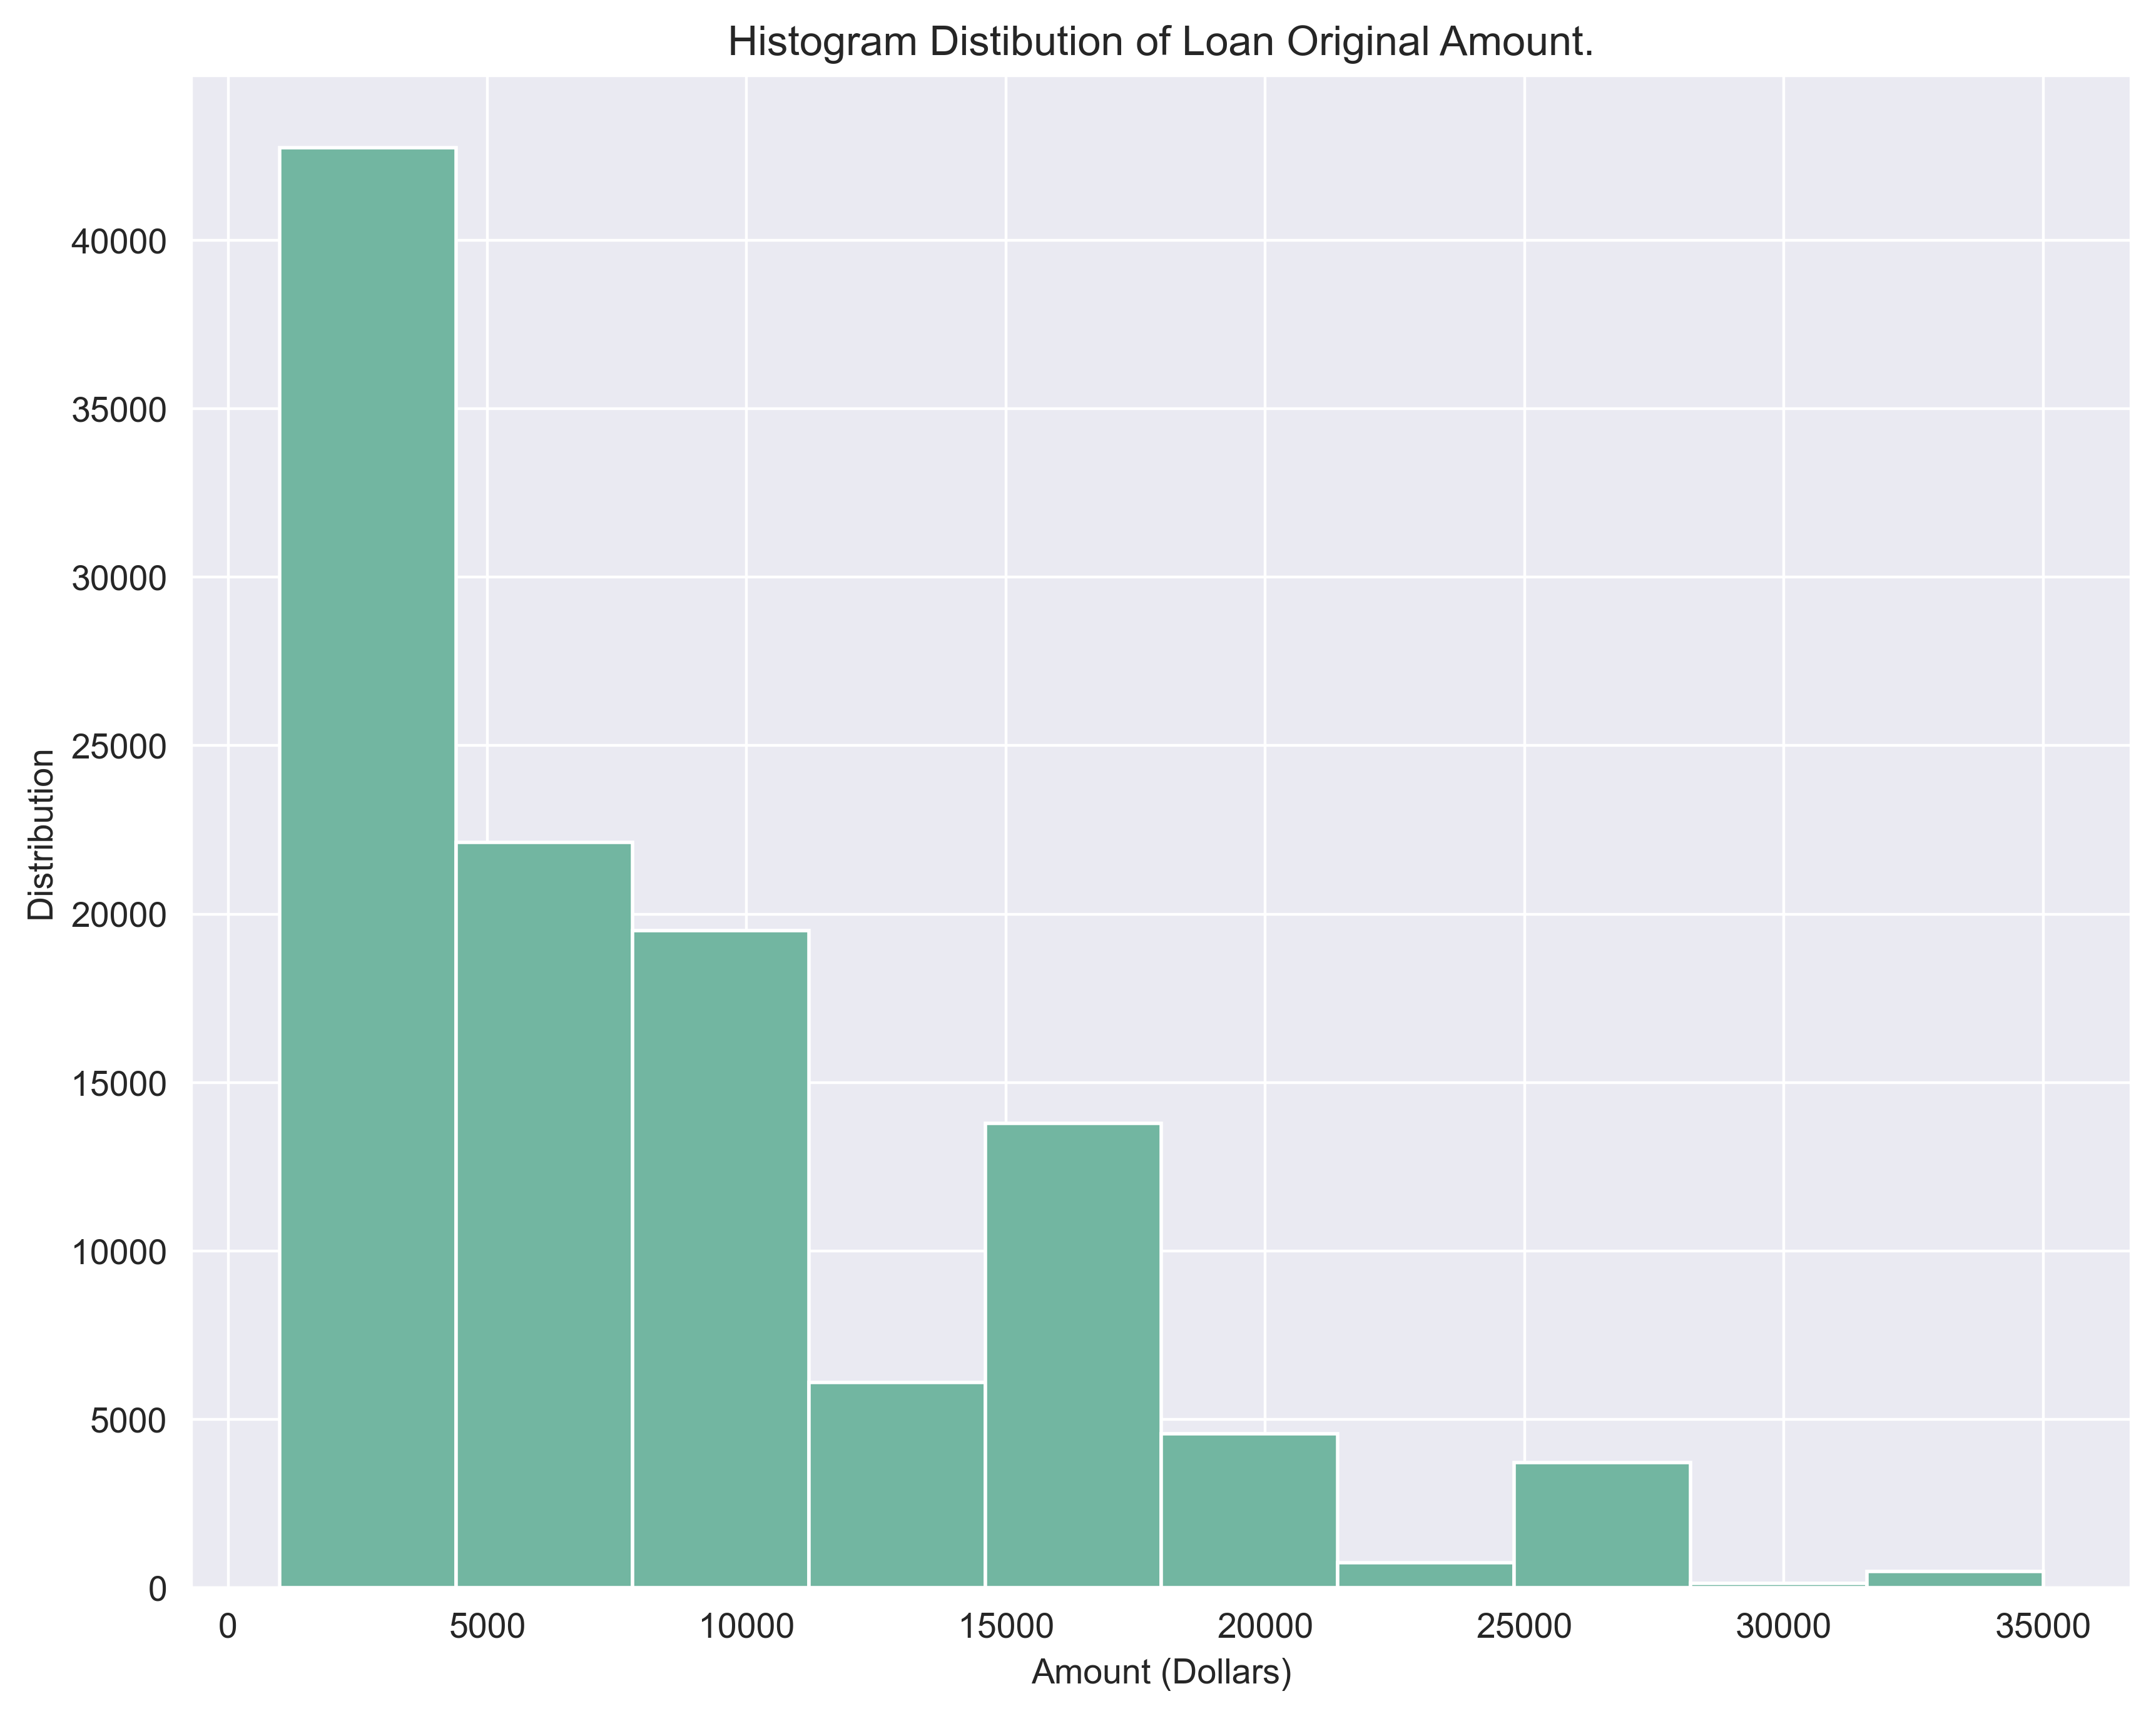

In [99]:
# call func to plot hist of loan original amount
draw_hist(shrink_loan_df.LoanOriginalAmount, 'Histogram Distibution of Loan Original Amount.')

## Histogram Distibution of Monthly Loan Payment

> The monthly loan payment is also right-skewed, a case of symmetrical distribution. Most of the monthly loan payment are clustered on the left side of the histogram. The peak of the original loan amount occurs at about 173 dollars, the data spread is from about zero dollars to 2251 dollars.

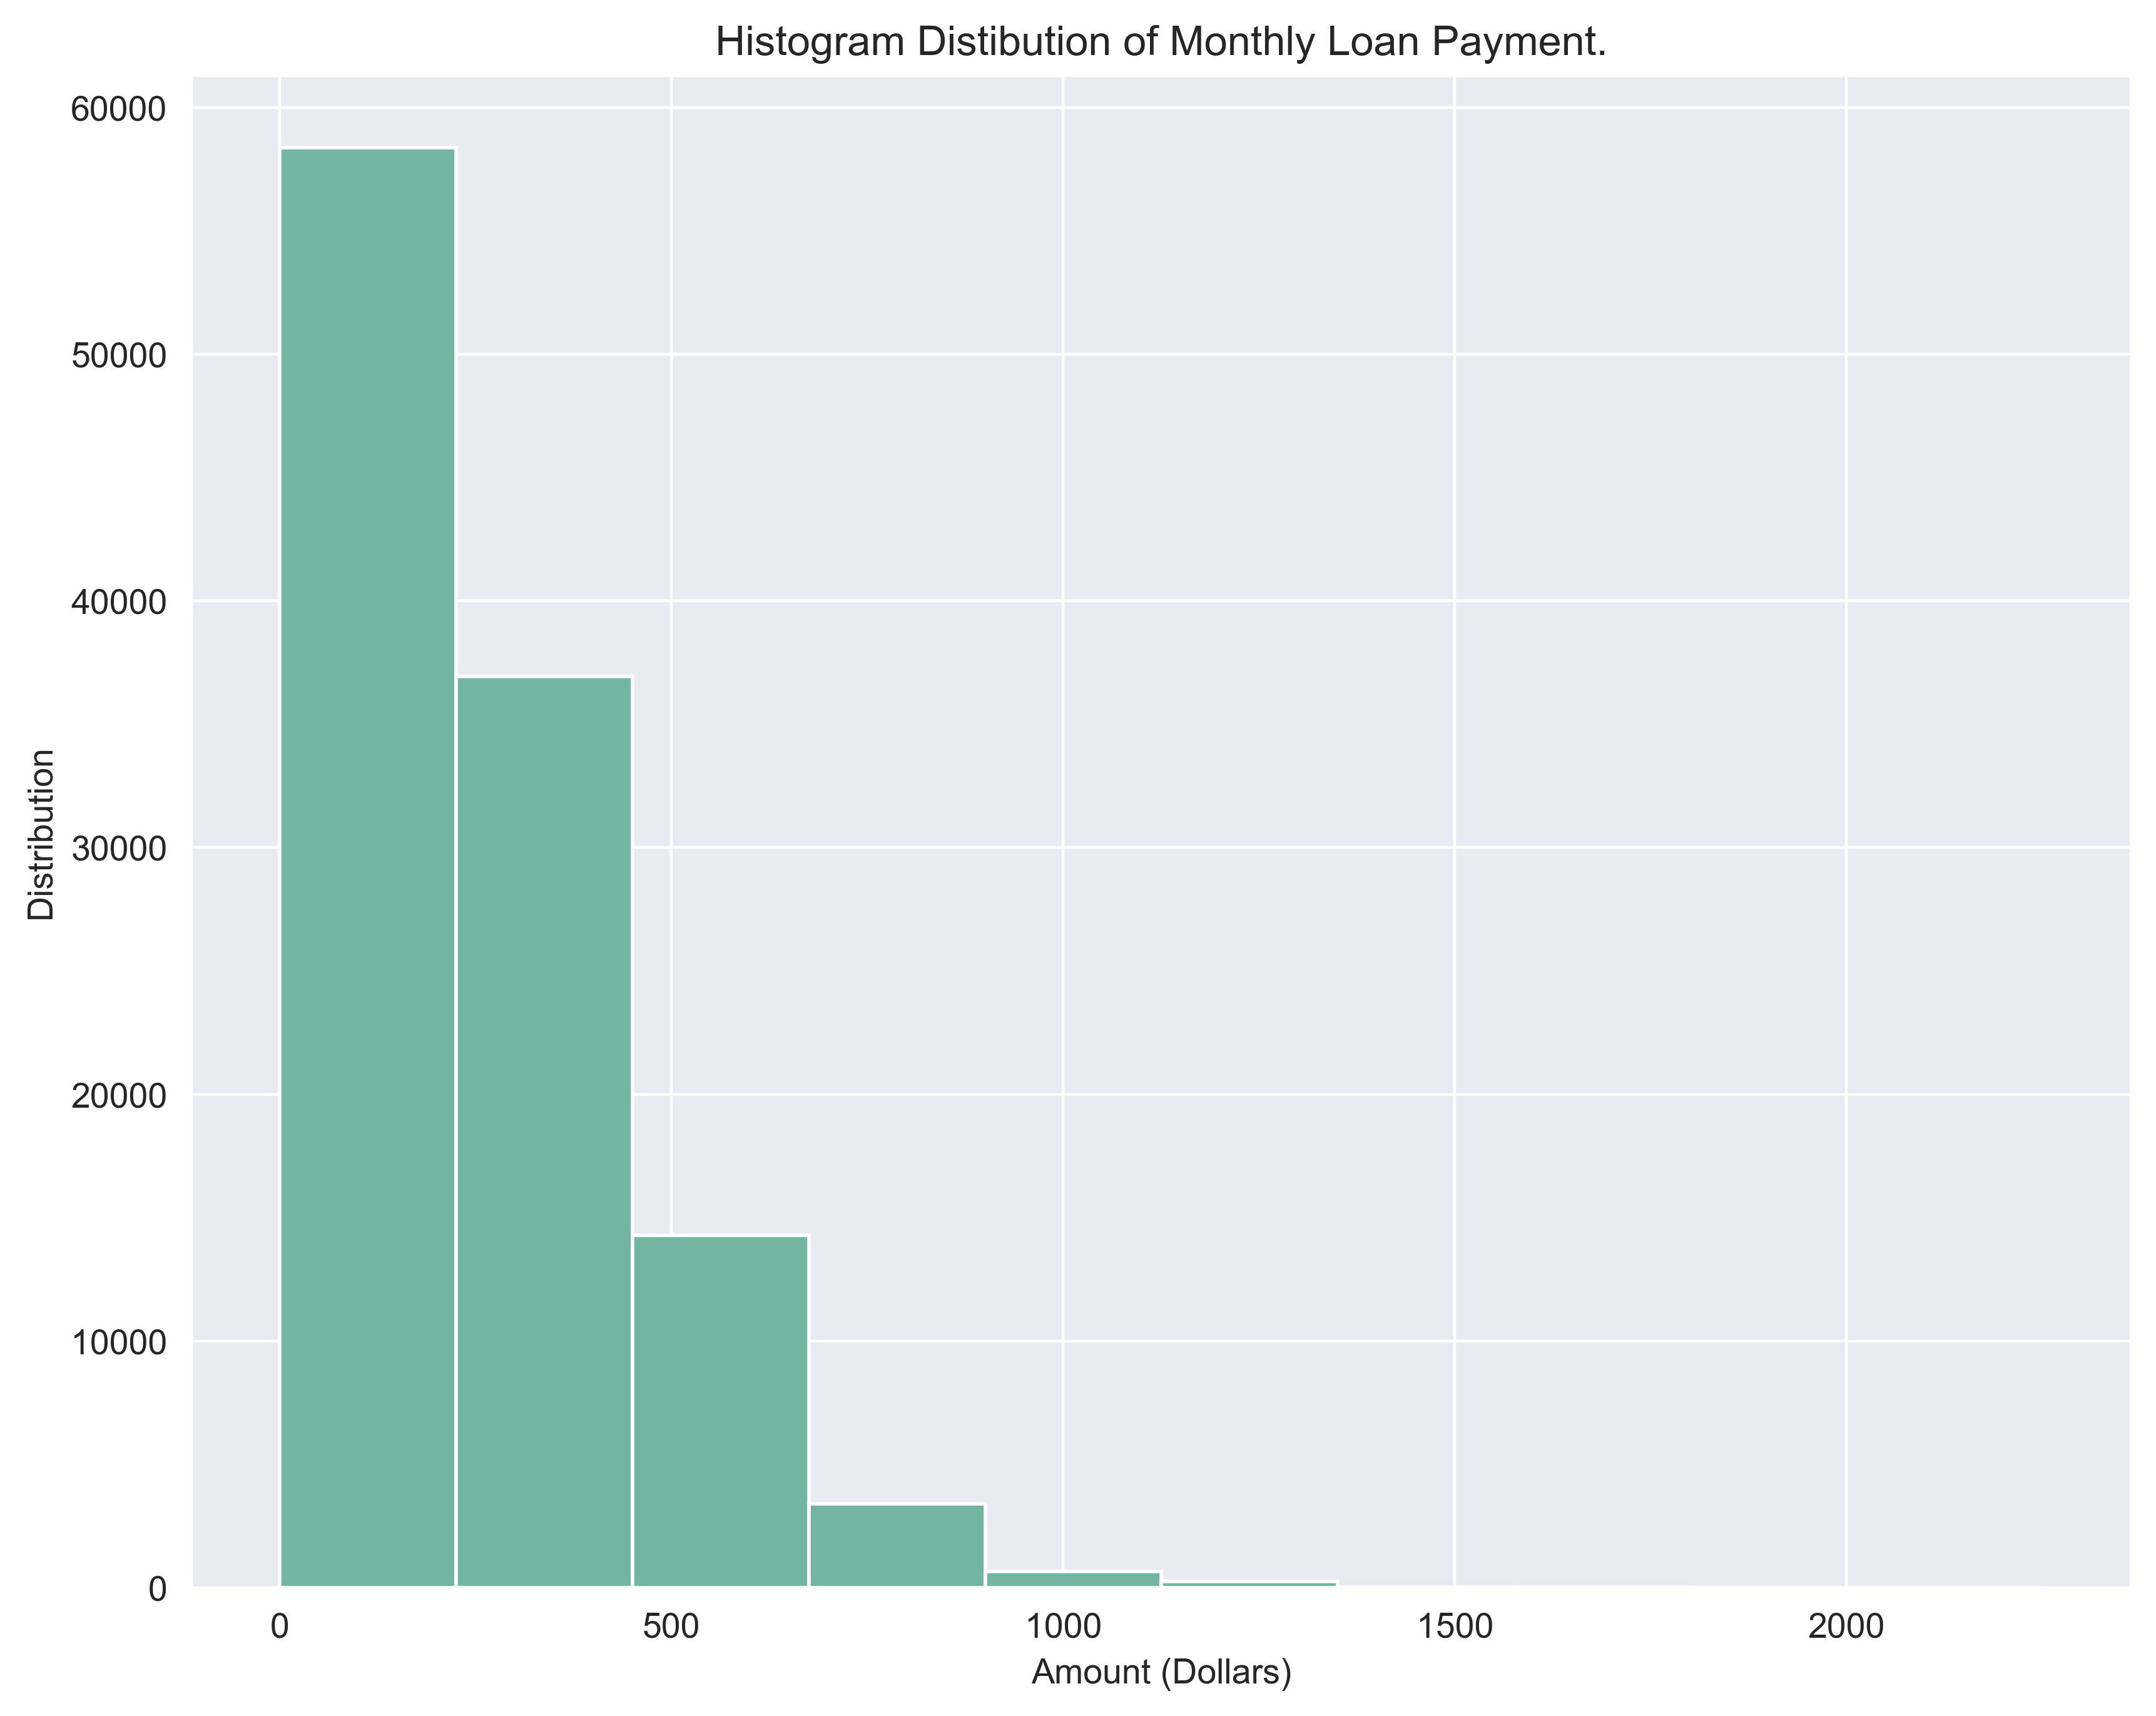

In [100]:
# call func to plot hist of monthly loan payment
draw_hist(shrink_loan_df.MonthlyLoanPayment, 'Histogram Distibution of Monthly Loan Payment.')

In [101]:
# define a func to plot kernel
# density estimate
def draw_kde(x, title):
    """plot a kernel density estimate"""
    """param: x, title"""
    """return none"""
    plt.figure(figsize=(10,8), dpi = 400)
    sns.kdeplot(x = x, data = shrink_loan_df, fill = True)
    plt.xlabel('Amount(Dollars)')
    plt.title(title)

## Kernel Density Estimate for Loan Original Amount
> To identify a kernel density estimate data point of loan original amount. i.e the probabilty density function of the data points. Densities are useful because they can be used to calculate probabilities. From the visualization below the probability that a randomly chosen loan original amount will fall between 5000 dollars and 12000 dollars can be calculated as the area between the density function (graph) and the x-axis in the interval [5000, 12000].

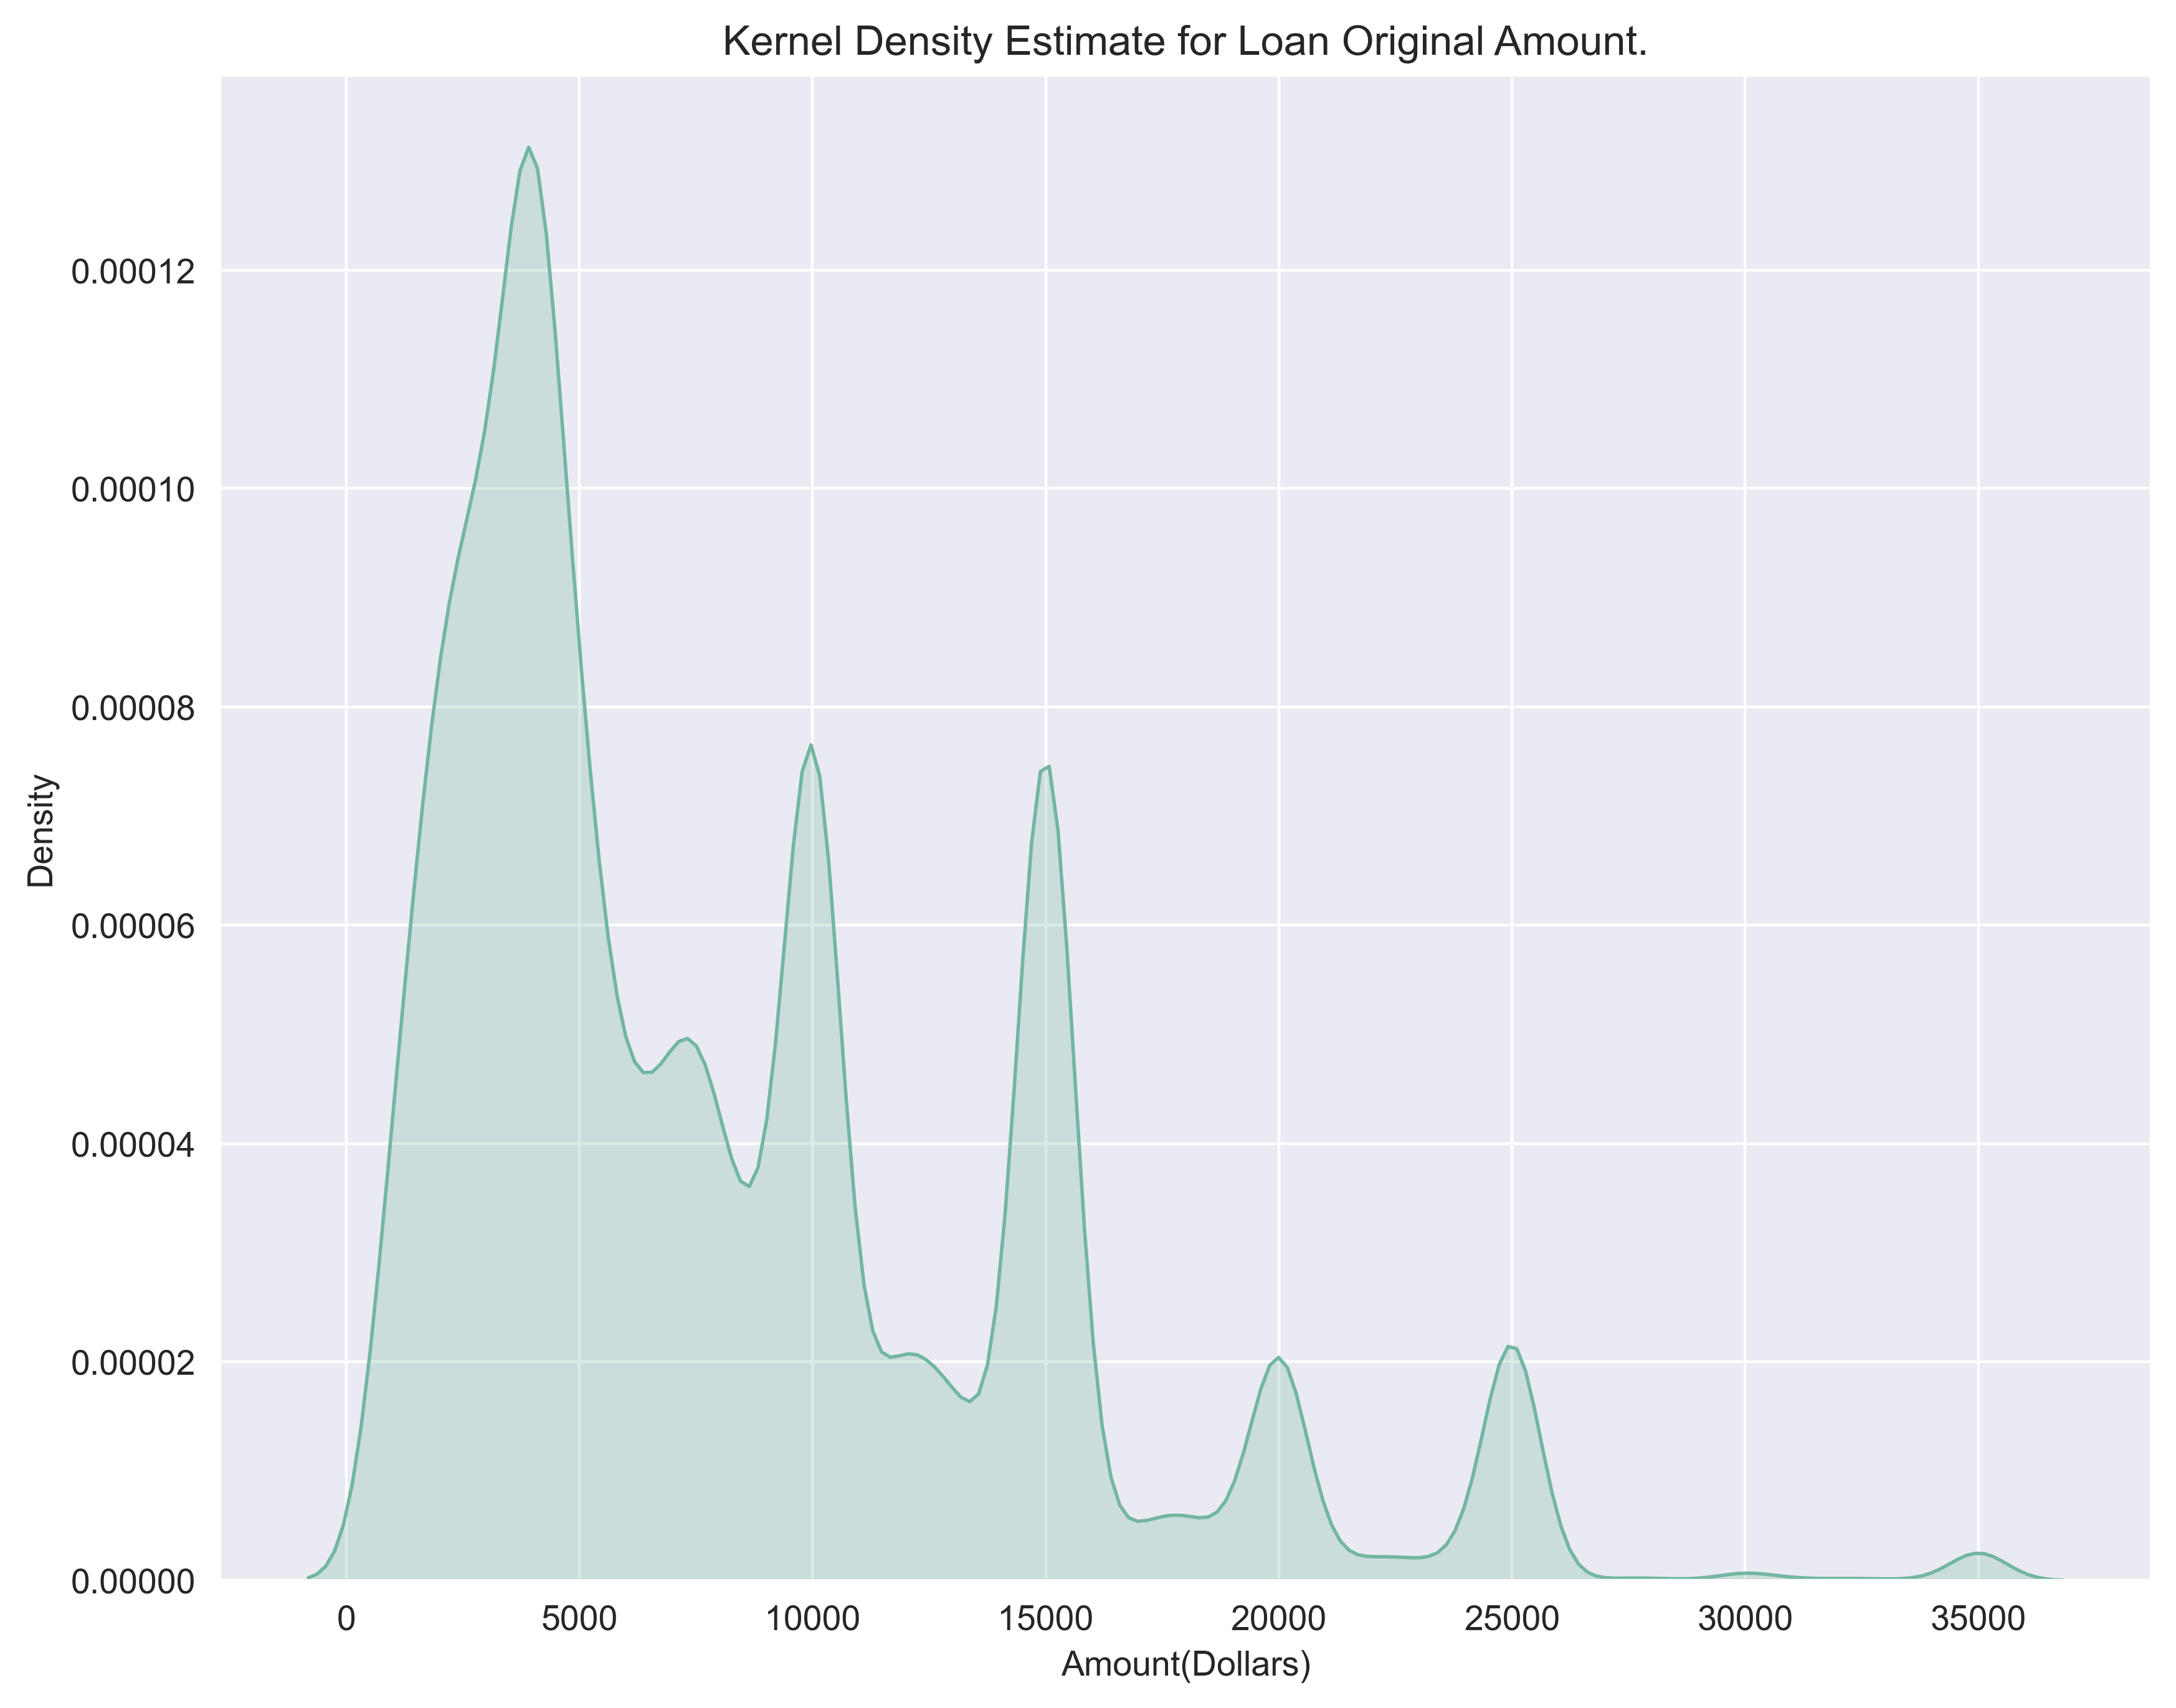

In [102]:
# plot kernel density estimate for loan original amount
draw_kde('LoanOriginalAmount', 'Kernel Density Estimate for Loan Original Amount.')

## Kernel Density Estimate for Monthly Loan Payment
> To identify a kernel density estimate data point of loan original amount. i.e the probabilty density function of the data points. Densities are useful because they can be used to calculate probabilities. From the visualization below the probability that a randomly chosen monthly lona payment will fall between 300 dollars and 500 dollars can be calculated as the area between the density function (graph) and the x-axis in the interval [300, 500].

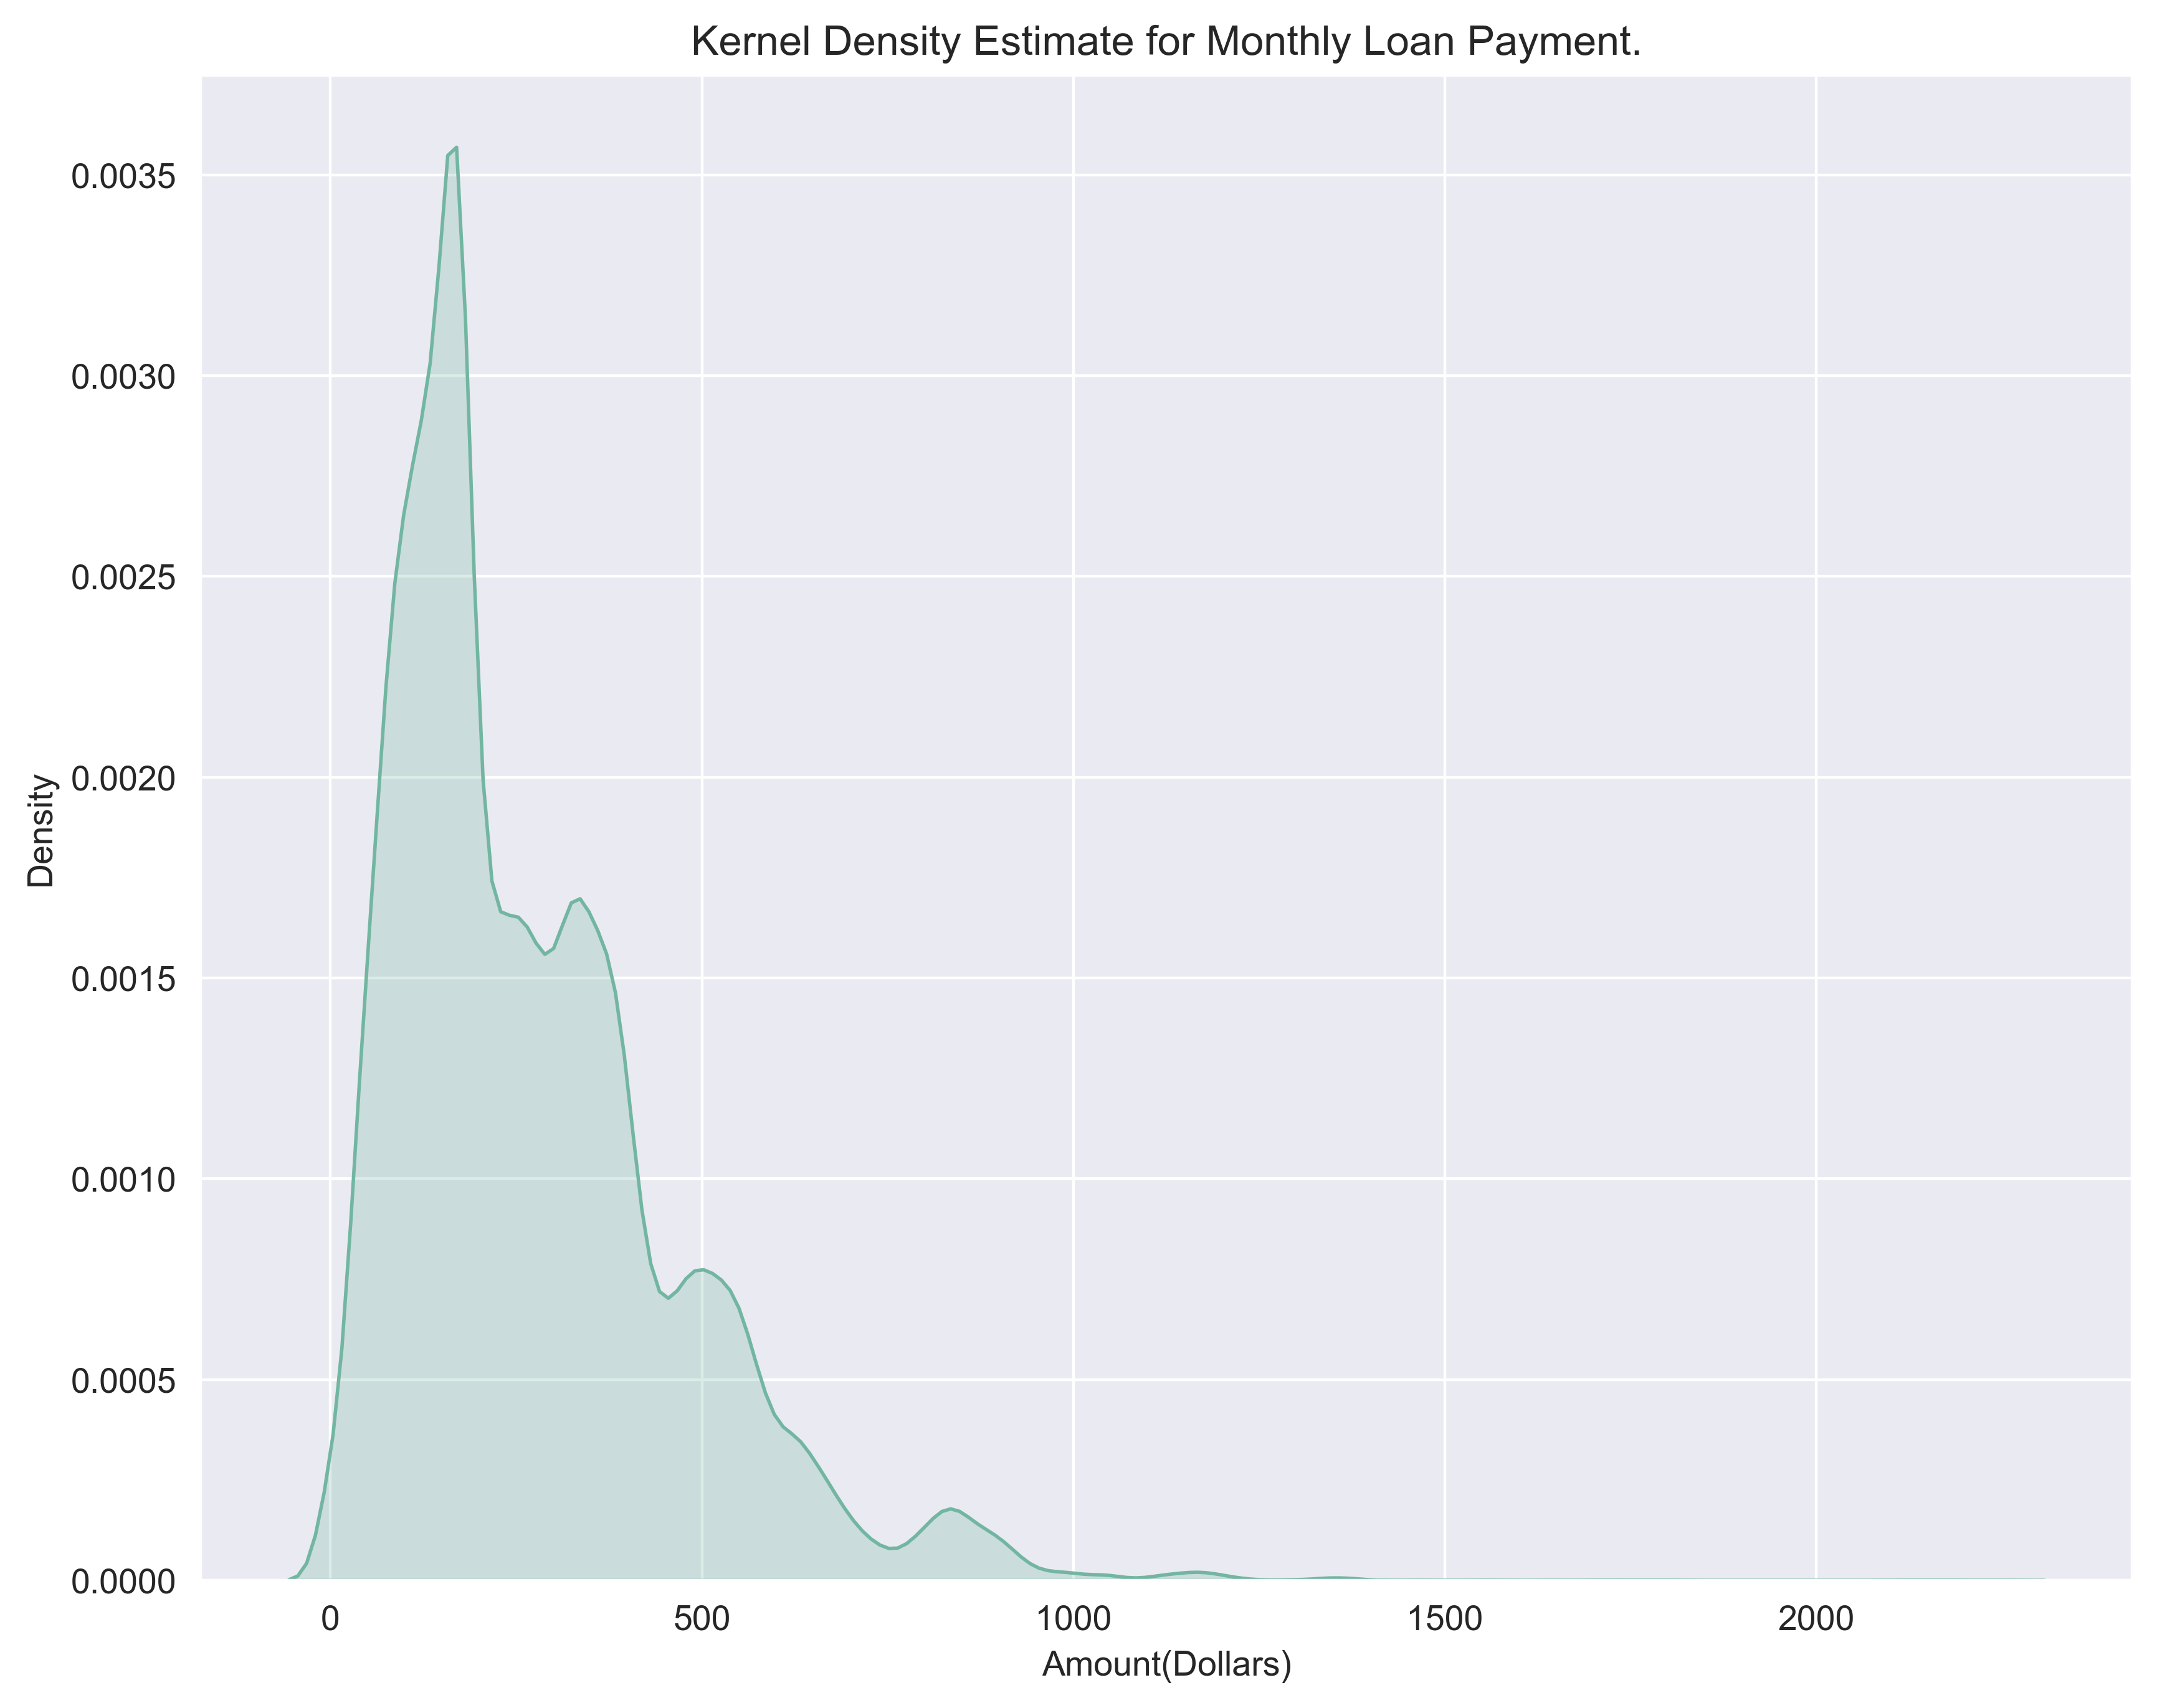

In [103]:
# plot kernel density estimate for monthly loan payment
draw_kde('MonthlyLoanPayment', 'Kernel Density Estimate for Monthly Loan Payment.')

In [104]:
# a func to plot a univariate countplot
def draw_univariate_count_plot(x, title):
    """plot a countplot"""
    """param: x, title"""
    """return none"""
    plt.figure(figsize=(8,6), dpi = 400)
    ax = sns.countplot(x = x, data = shrink_loan_df)
    for p in ax.patches:
      ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0, p.get_height()+0.05))
    plt.suptitle(title)
    plt.xticks(rotation = 90)
    plt.plot()   
plt.show();

## Term of Loan Distribution
> To identify the frequency of the categorical variables term of loan; it was figured out from the visuals below that loans disbursed on the medium term in this case 36months has the highest occurence with a count of 87778 representing about 77 percent of loan term duration, leaving the other 23 percent distributed between the long term (60 months) and short term (12months)loan duration.

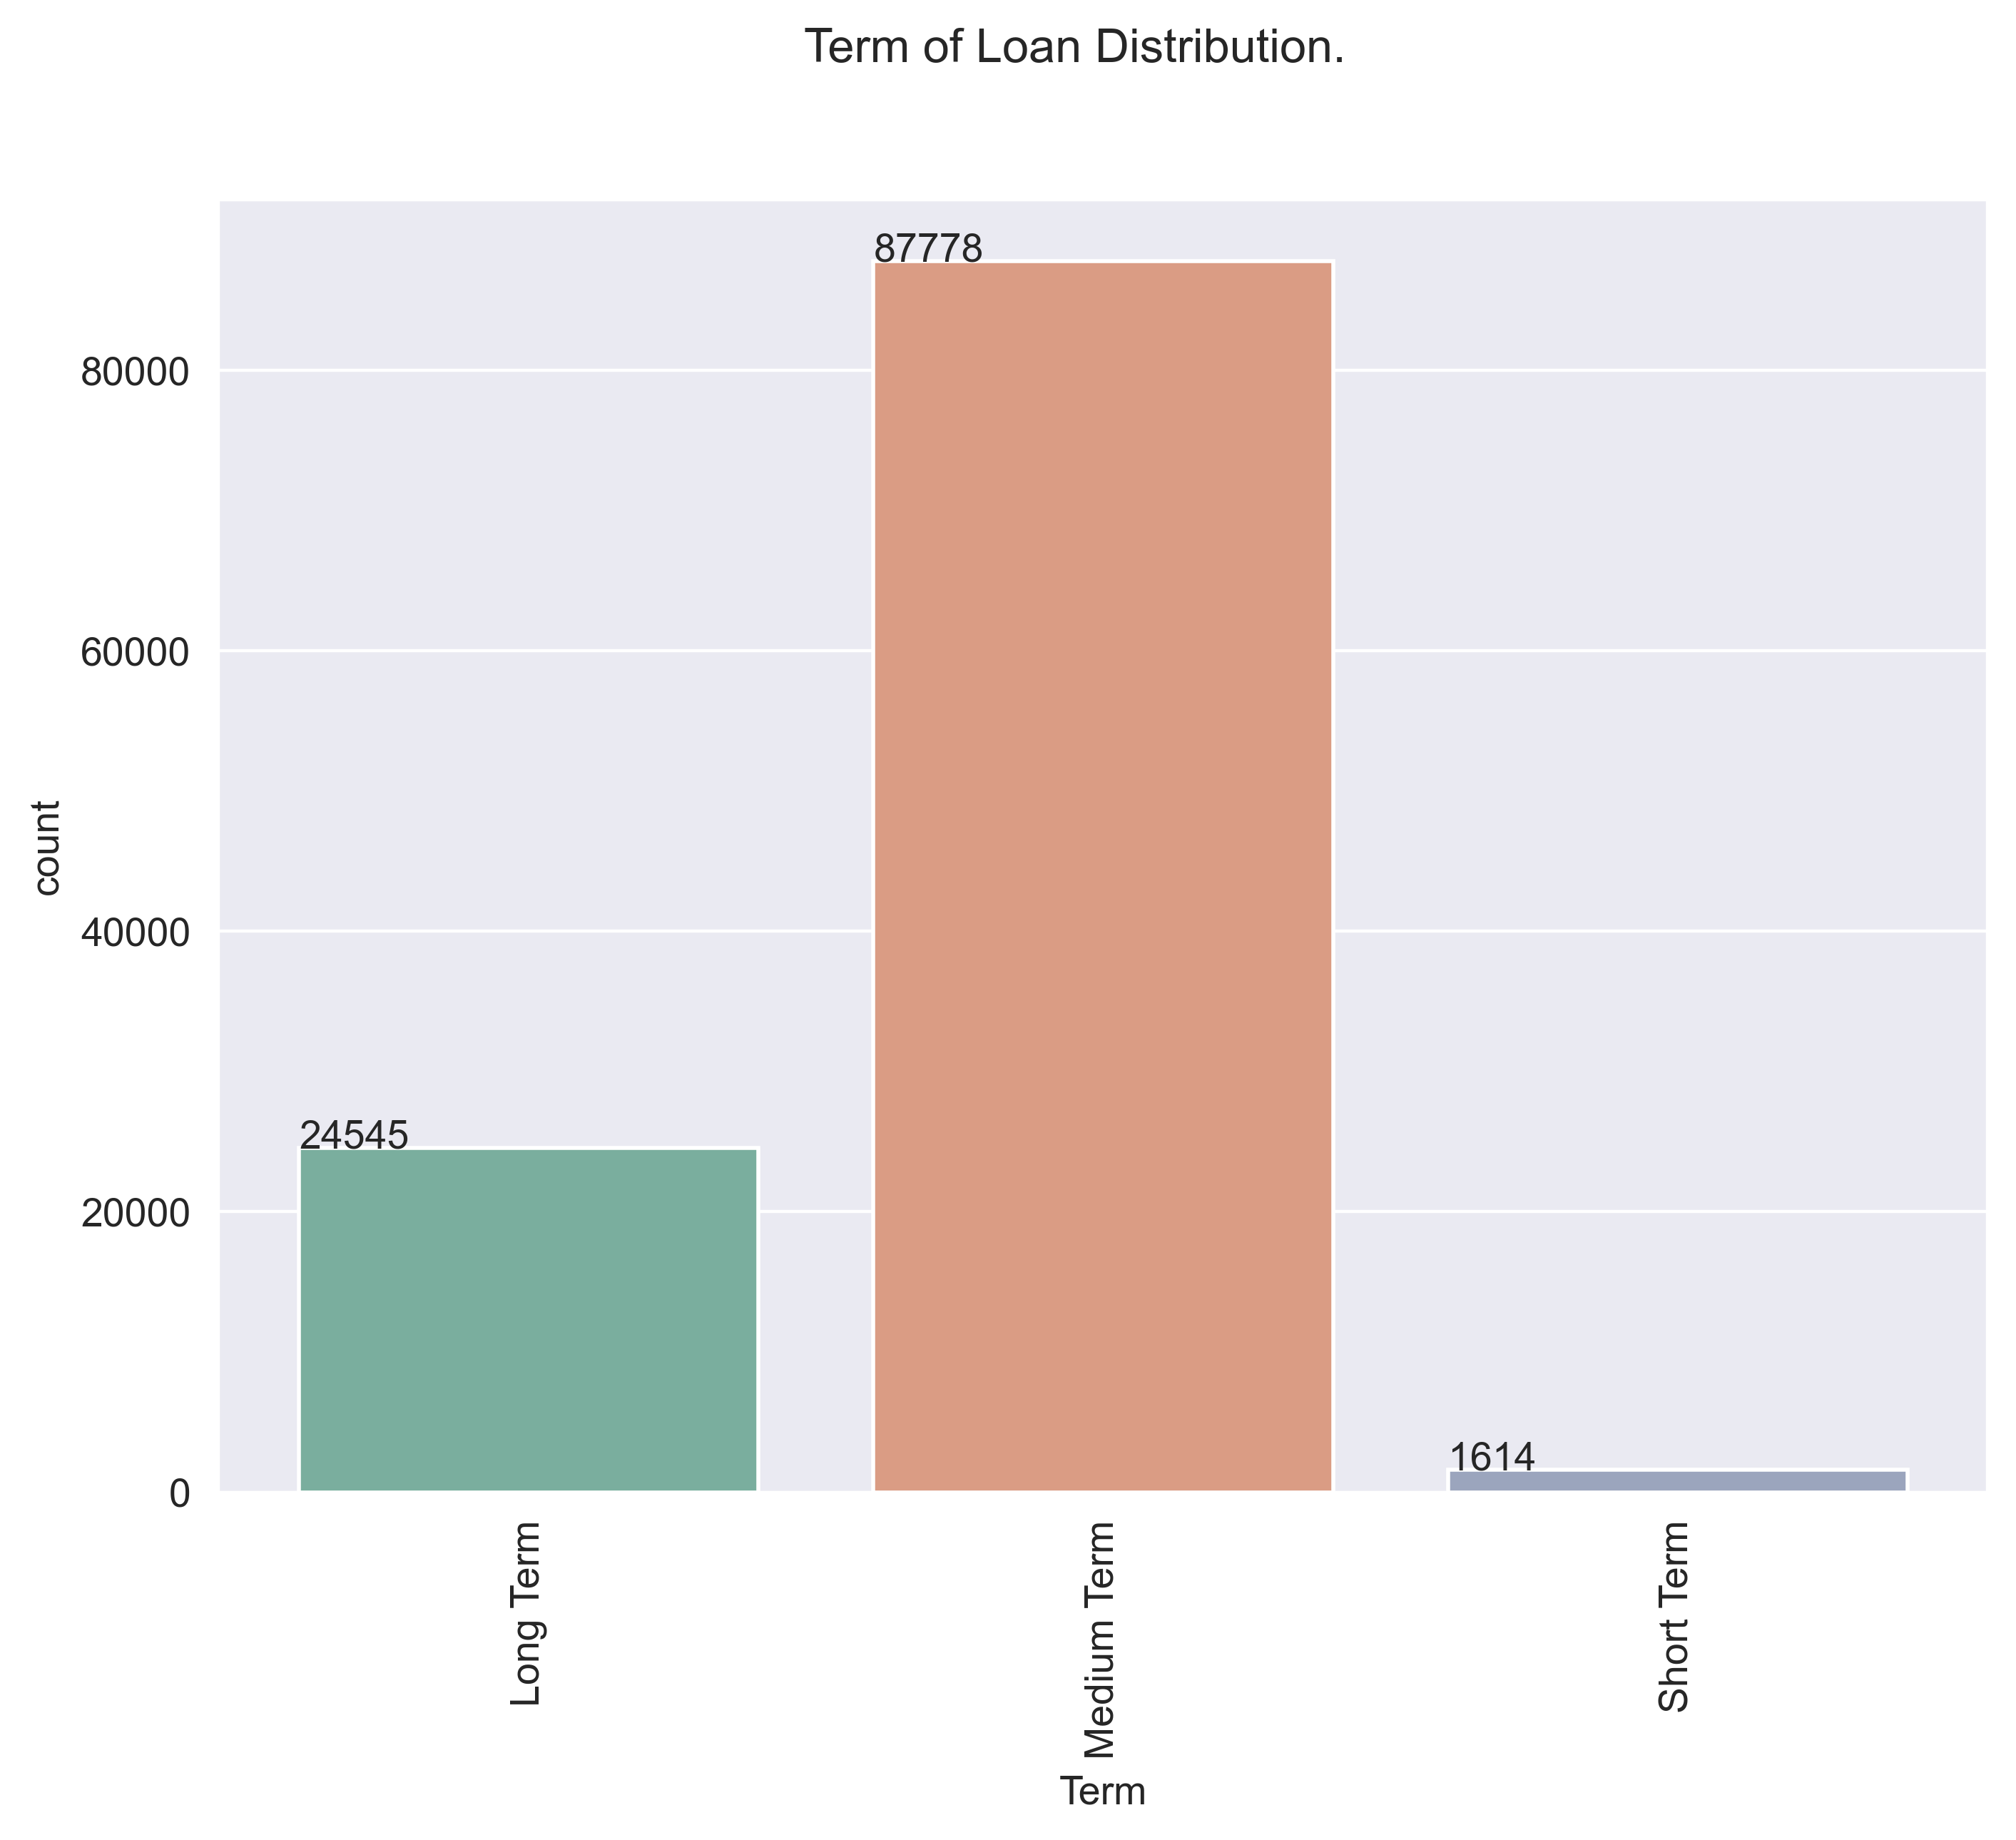

In [105]:
# call func to draw countplot
# of the feature term 
draw_univariate_count_plot('Term', 'Term of Loan Distribution.')

## Borrower's Employment Status Distribution
> To identify the frequency of the categorical variables borrower's employment status; it was discovered from the visuals below that those who are employed has the highest occurence in the employment status category with a count of 69557, those who are retired got the lowest occurence in the employment status category, it's more likely to disburse a laon to working class compare to a retired individual.

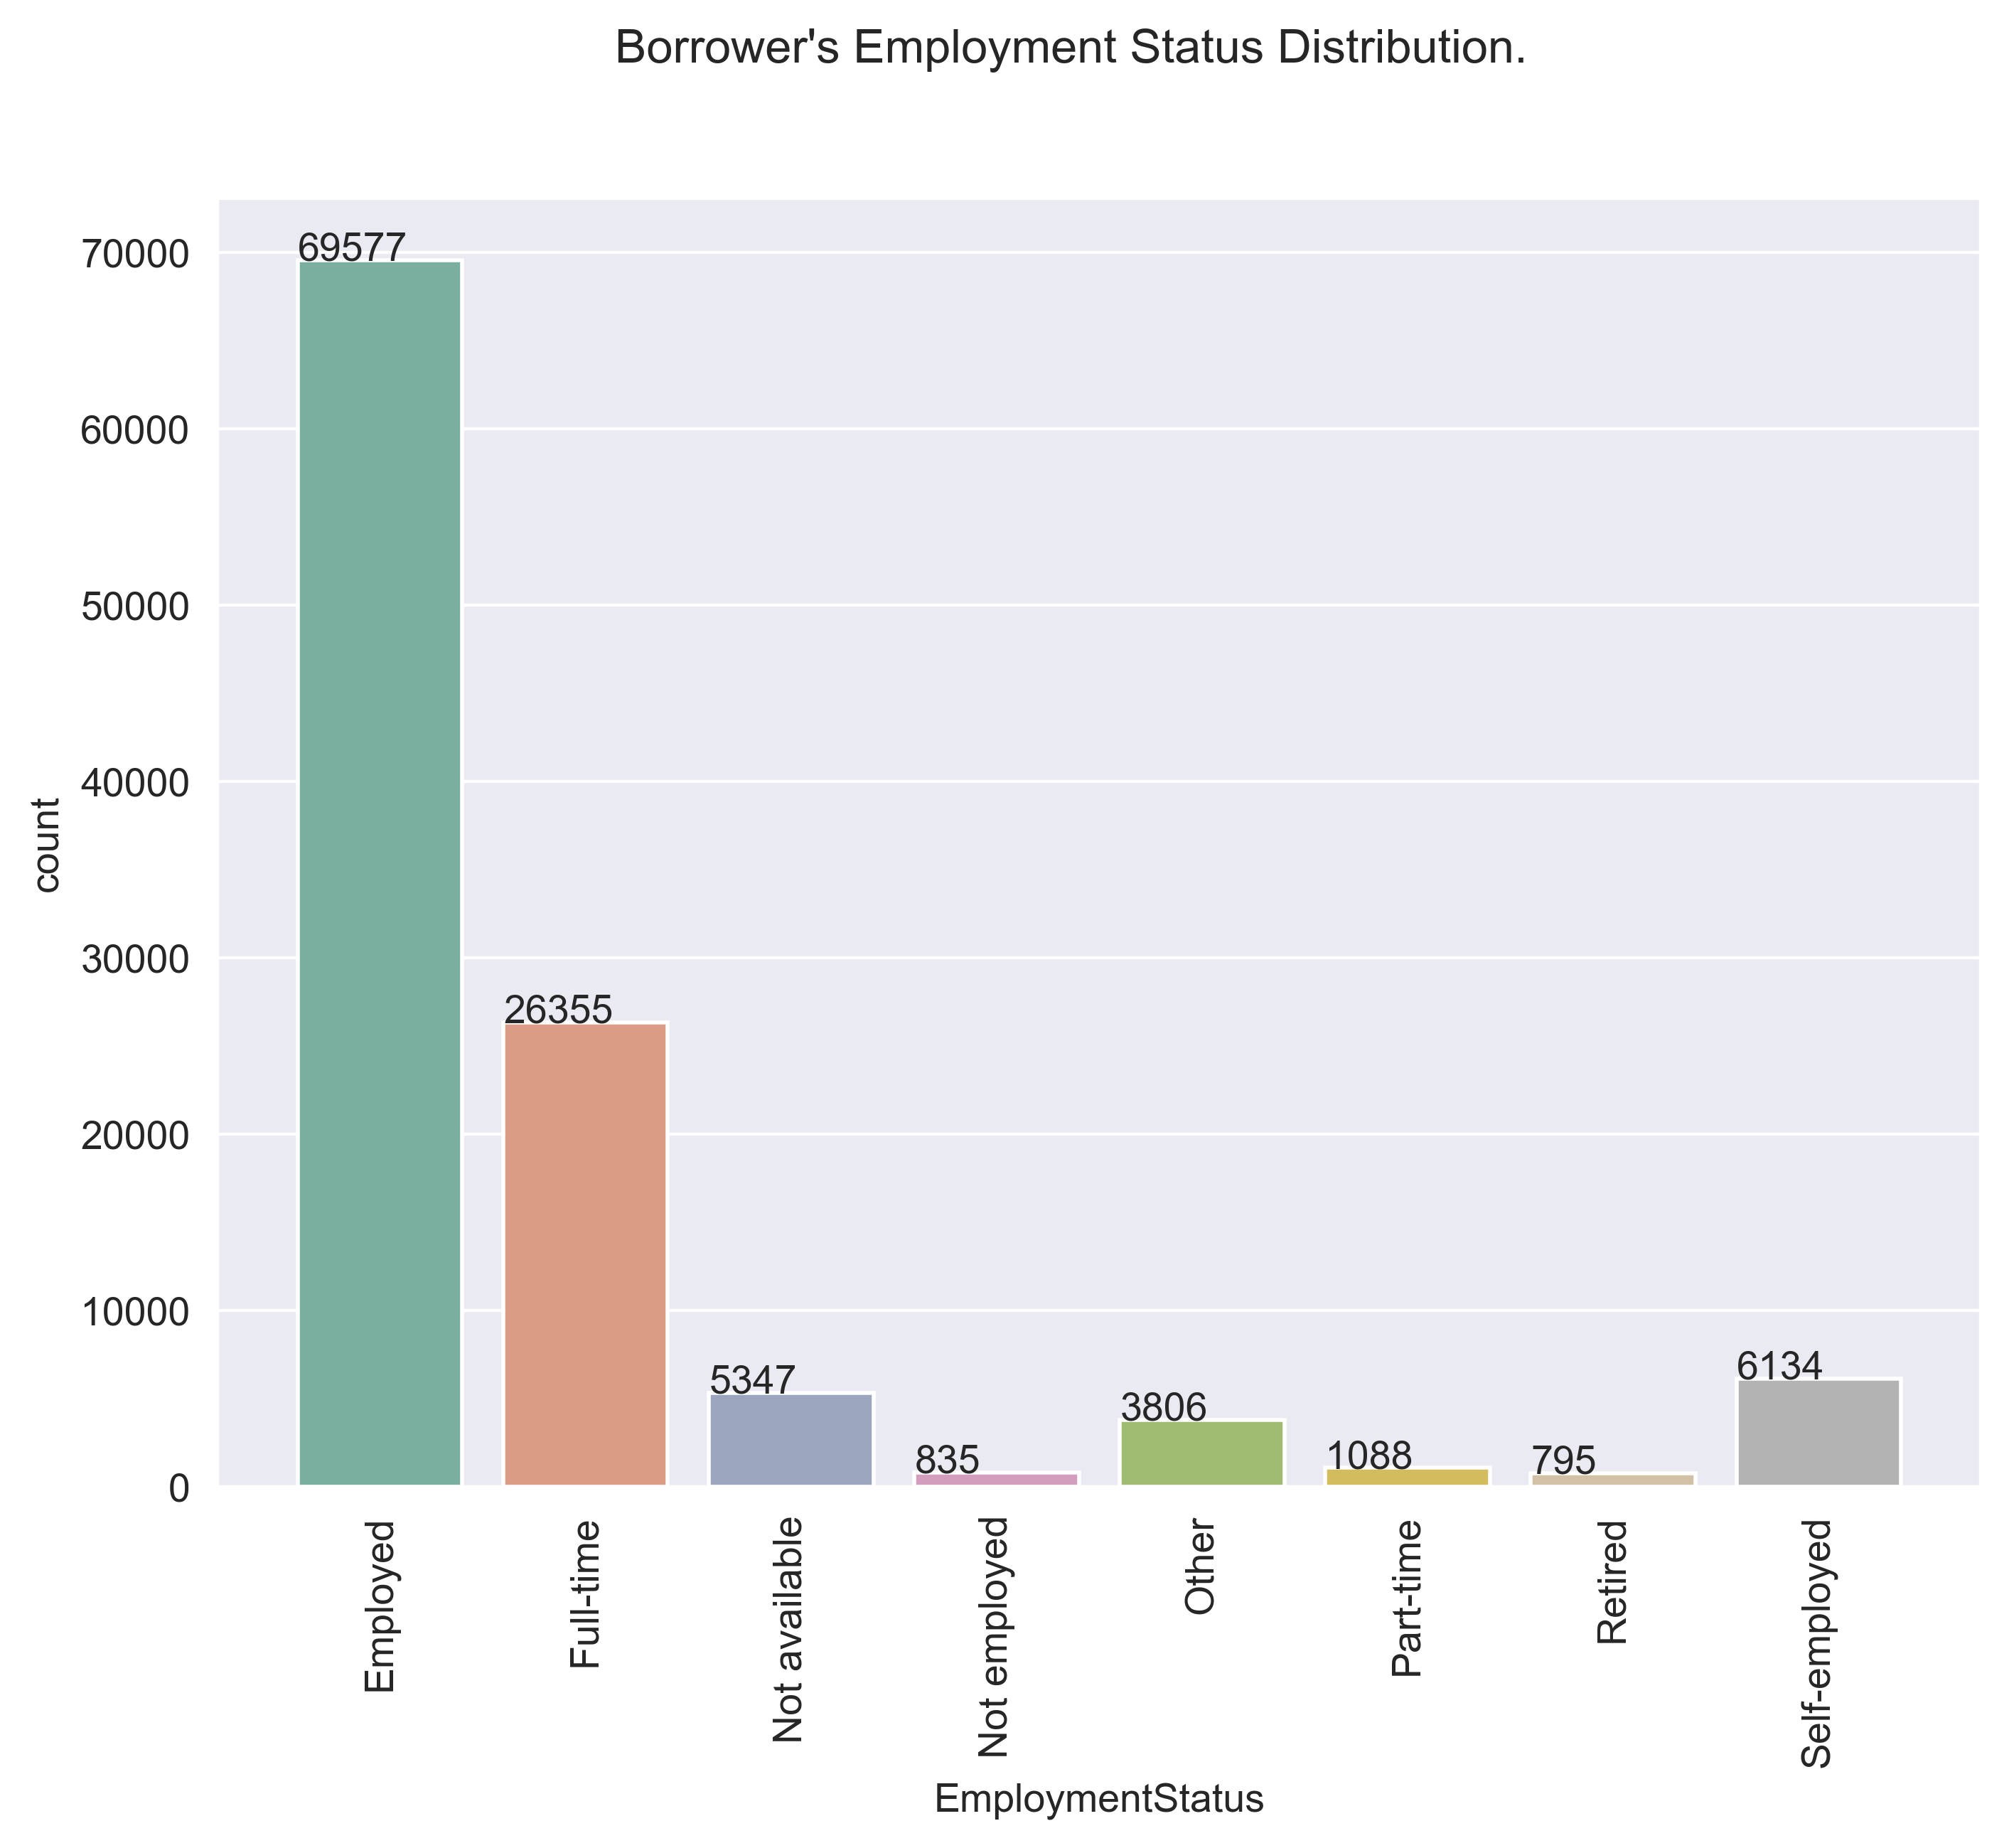

In [106]:
# call func to draw countplot
# of the feature Employment Status
draw_univariate_count_plot('EmploymentStatus', "Borrower's Employment Status Distribution.")

## Loan Distribution by Year
> To identify the frequency of the categorical variables year; it was discovered from the visuals below that the year 2013 had the highest number of loan disbursment with a occurence of 34345, followed by the year 2012 and 2014 respectively at second and third position, the least loan disbursement occured in the year 2005 with a occurence of 22 loan disbursement.

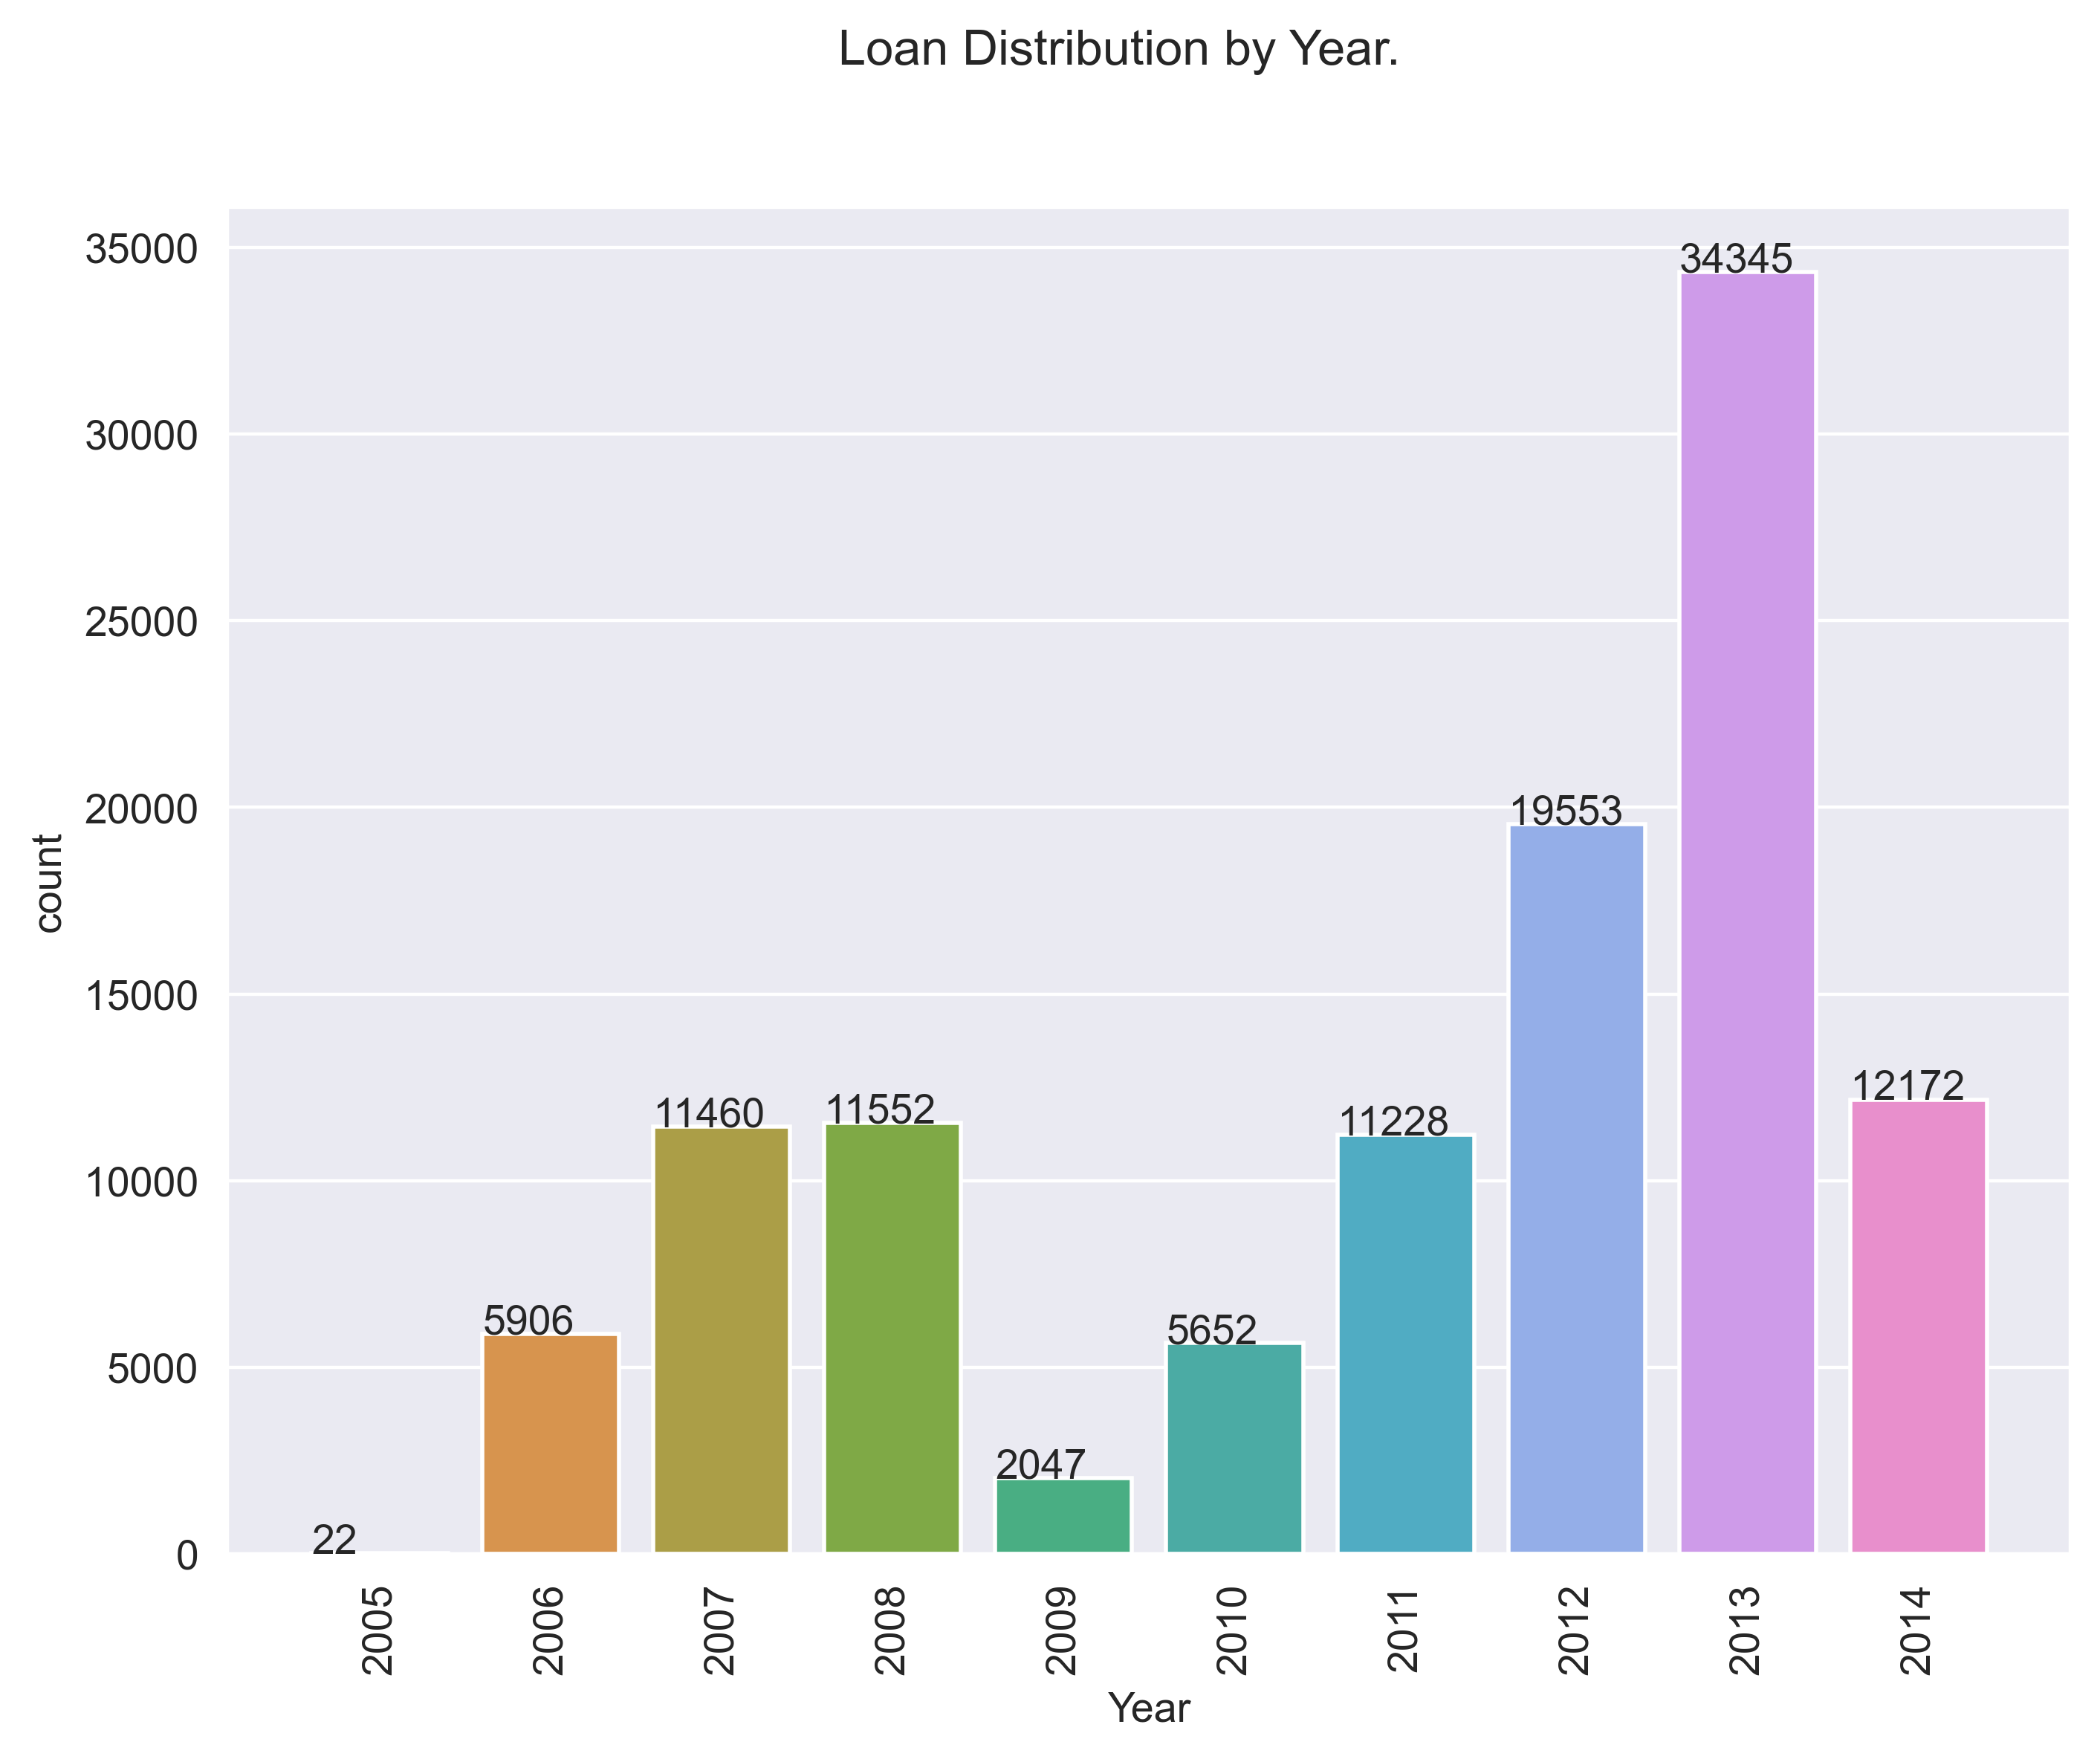

In [107]:
# call func to draw countplot
# of the feature term
draw_univariate_count_plot('Year', 'Loan Distribution by Year.')

In [108]:
# define a func to plot lineplot
def draw_line_plot(x, y, title):
    """plot a line plot"""
    """param: x, y, title"""
    """return none"""
    plt.figure(figsize=(8,6), dpi= 400)
    p = sns.lineplot(x = x, y = y, data = shrink_loan_df)
    plt.xlabel('Loan Original Amount(Dollars)')
    plt.ylabel('Monthly Loan Payment(Dollars)')
    plt.title(title); 

## Line Graph Depicting Relationship Between Monthly Loan Payment and Loan Original Amount
> To establish any relationship or correlation between the continuous numerical variables;  loan original amount, and monthly loan payment it was gathered from the visuals below that a positive correlation between the two variables, as the original loan amount increases the monthly loan payment increase relatively.

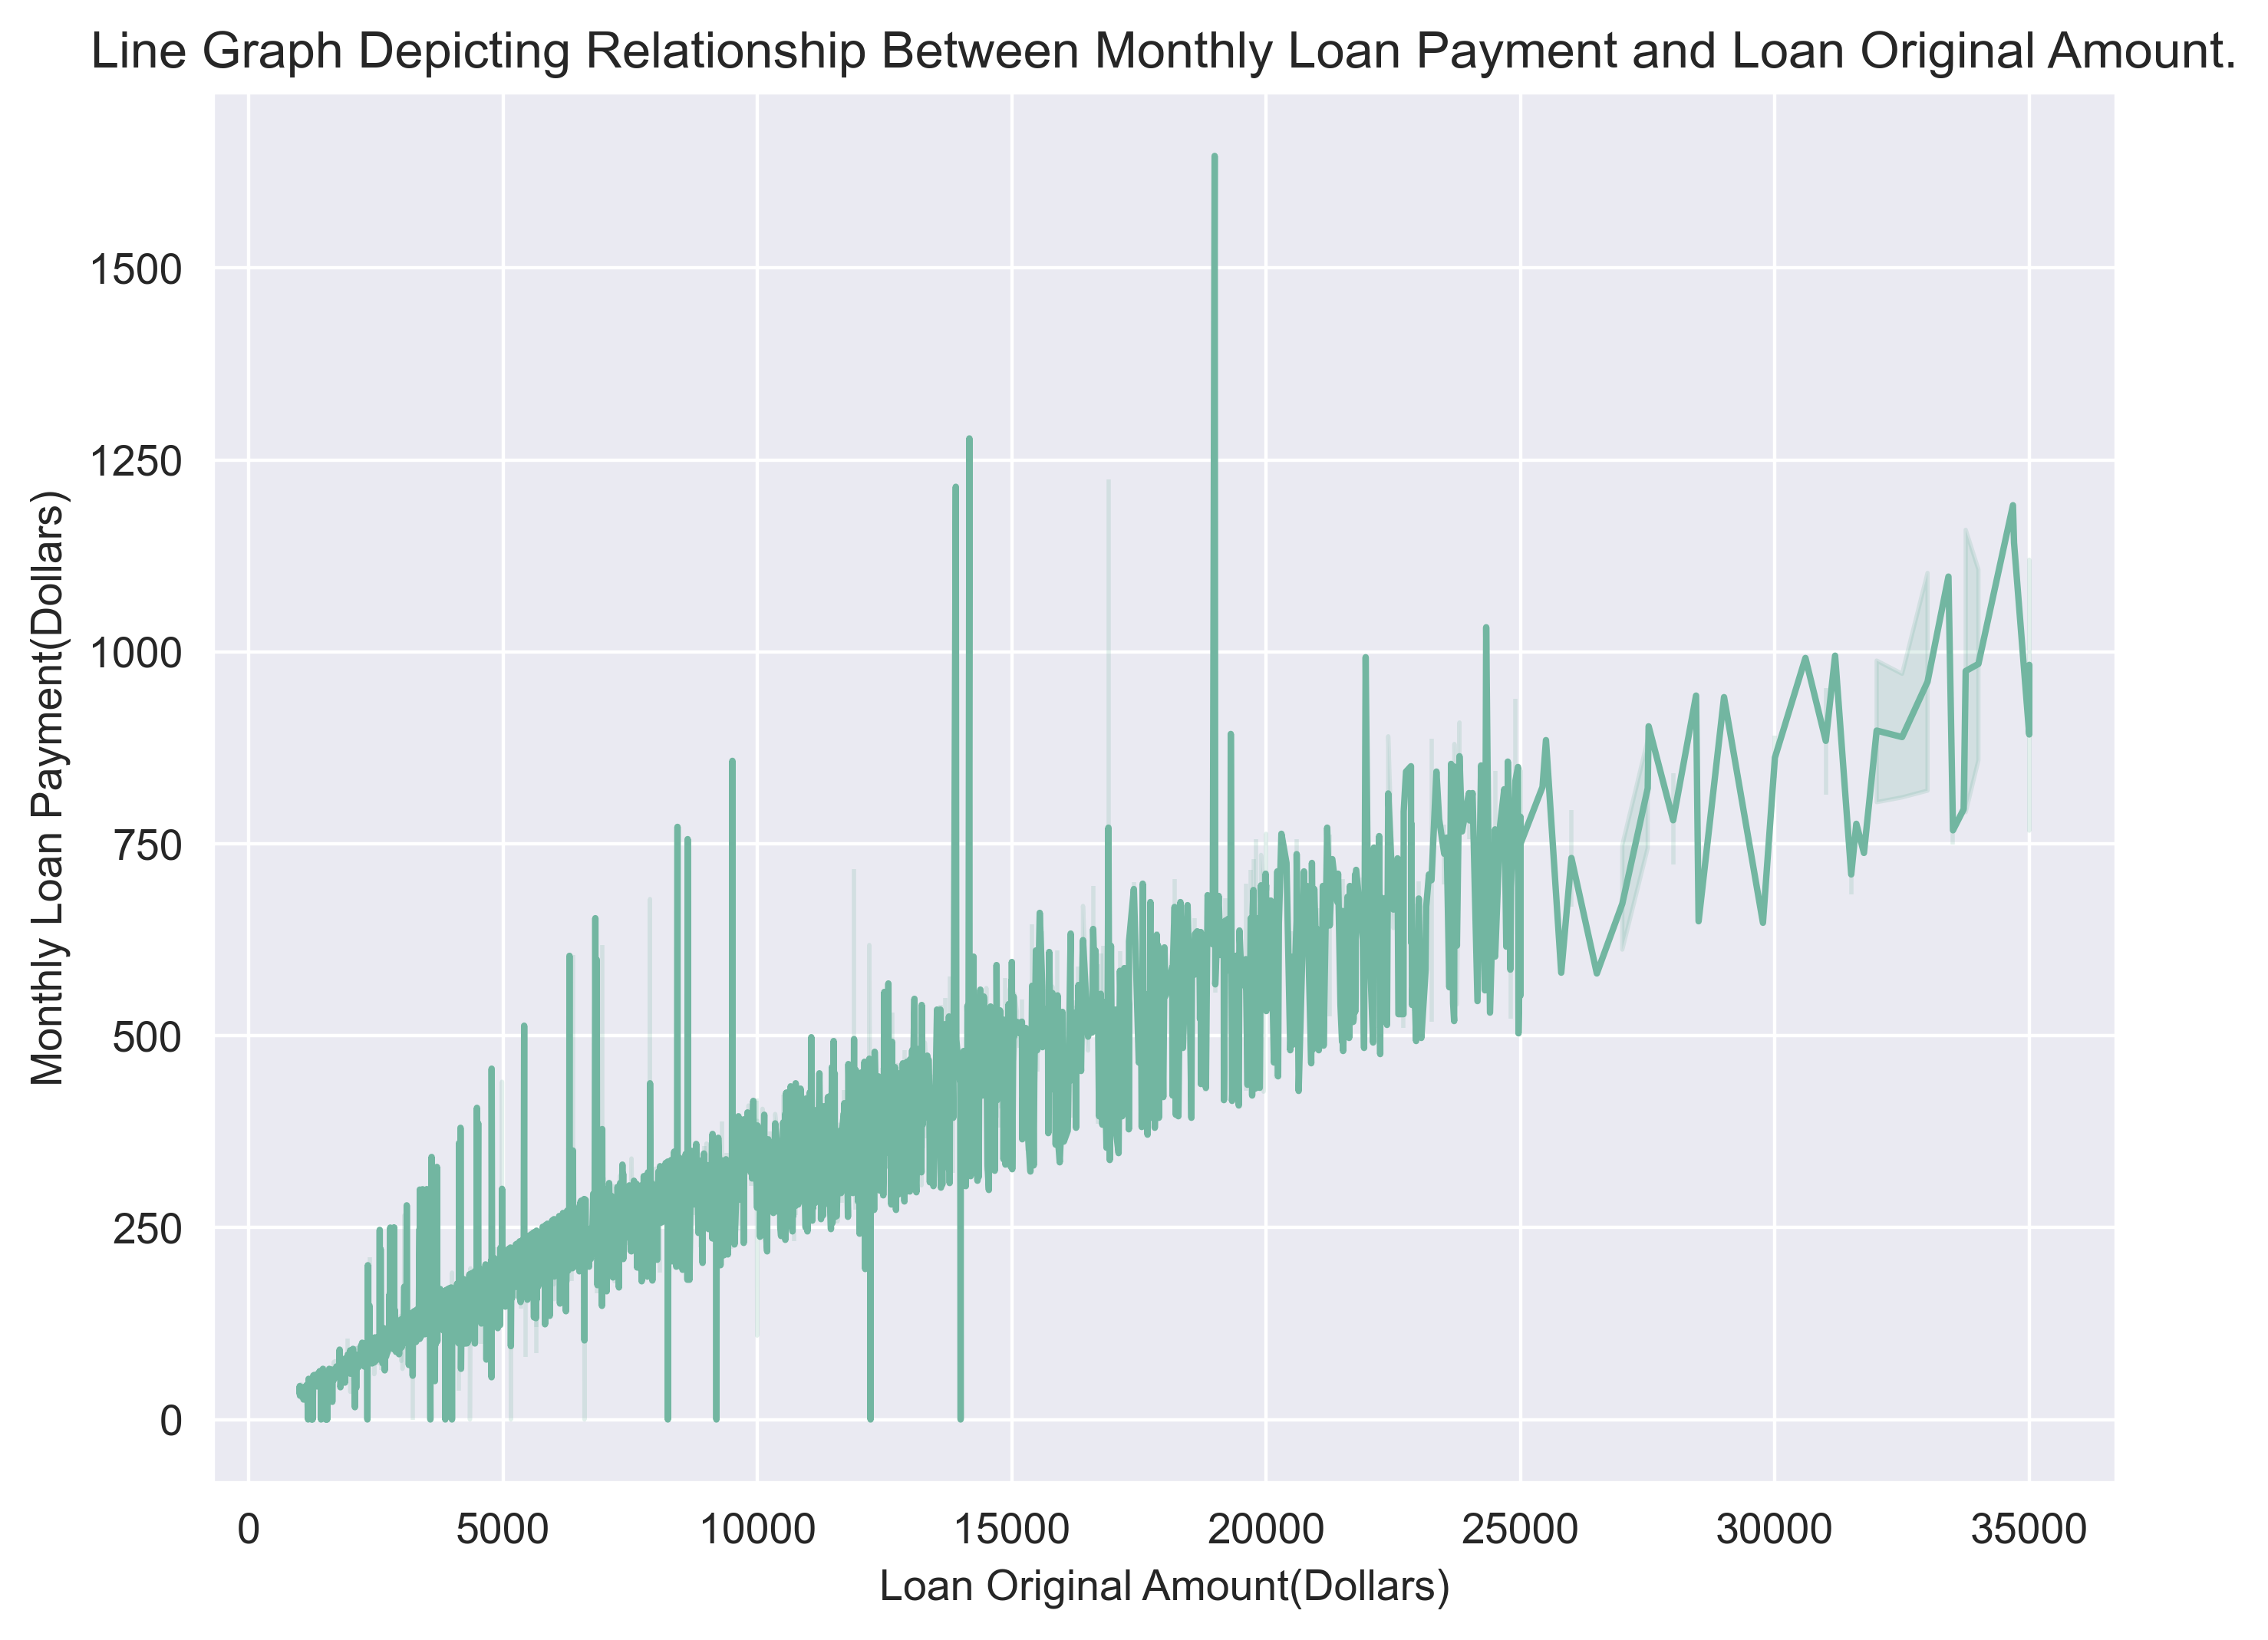

In [109]:
# call func to lineplot of monthly
# loan payment against loan original amount
draw_line_plot('LoanOriginalAmount', 'MonthlyLoanPayment', 'Line Graph Depicting Relationship Between Monthly Loan Payment and Loan Original Amount.')

In [110]:
# define func to plot scatter plot loan original
# amount against current days of delinquency 
def draw_scatter(hue, title):
    """plot a scatterplot"""
    """param: hue, title"""
    """return none"""
    plt.figure(figsize=(10,8), dpi = 400)
    sns.scatterplot(x = 'LoanOriginalAmount', y = 'MonthlyLoanPayment', hue = hue, data = shrink_loan_df)
    plt.xlabel('Loan Original Amount(Dollars)')
    plt.ylabel('Monthly Loan Payment(Dollars)')
    plt.title(title);

## Original Loan Amount Against Current Days of Delinquency Group by Loan Term
> To showcase the relationship between three variables, two continous numerical variable(loan original amount and monthly loan payment) and a categorical variable(term) it was cemented from earlier findings there exist a positive relationship between the loan original amount and monthly loan payment, the data point are spread across the scatterplot below categorized by term of loan. 

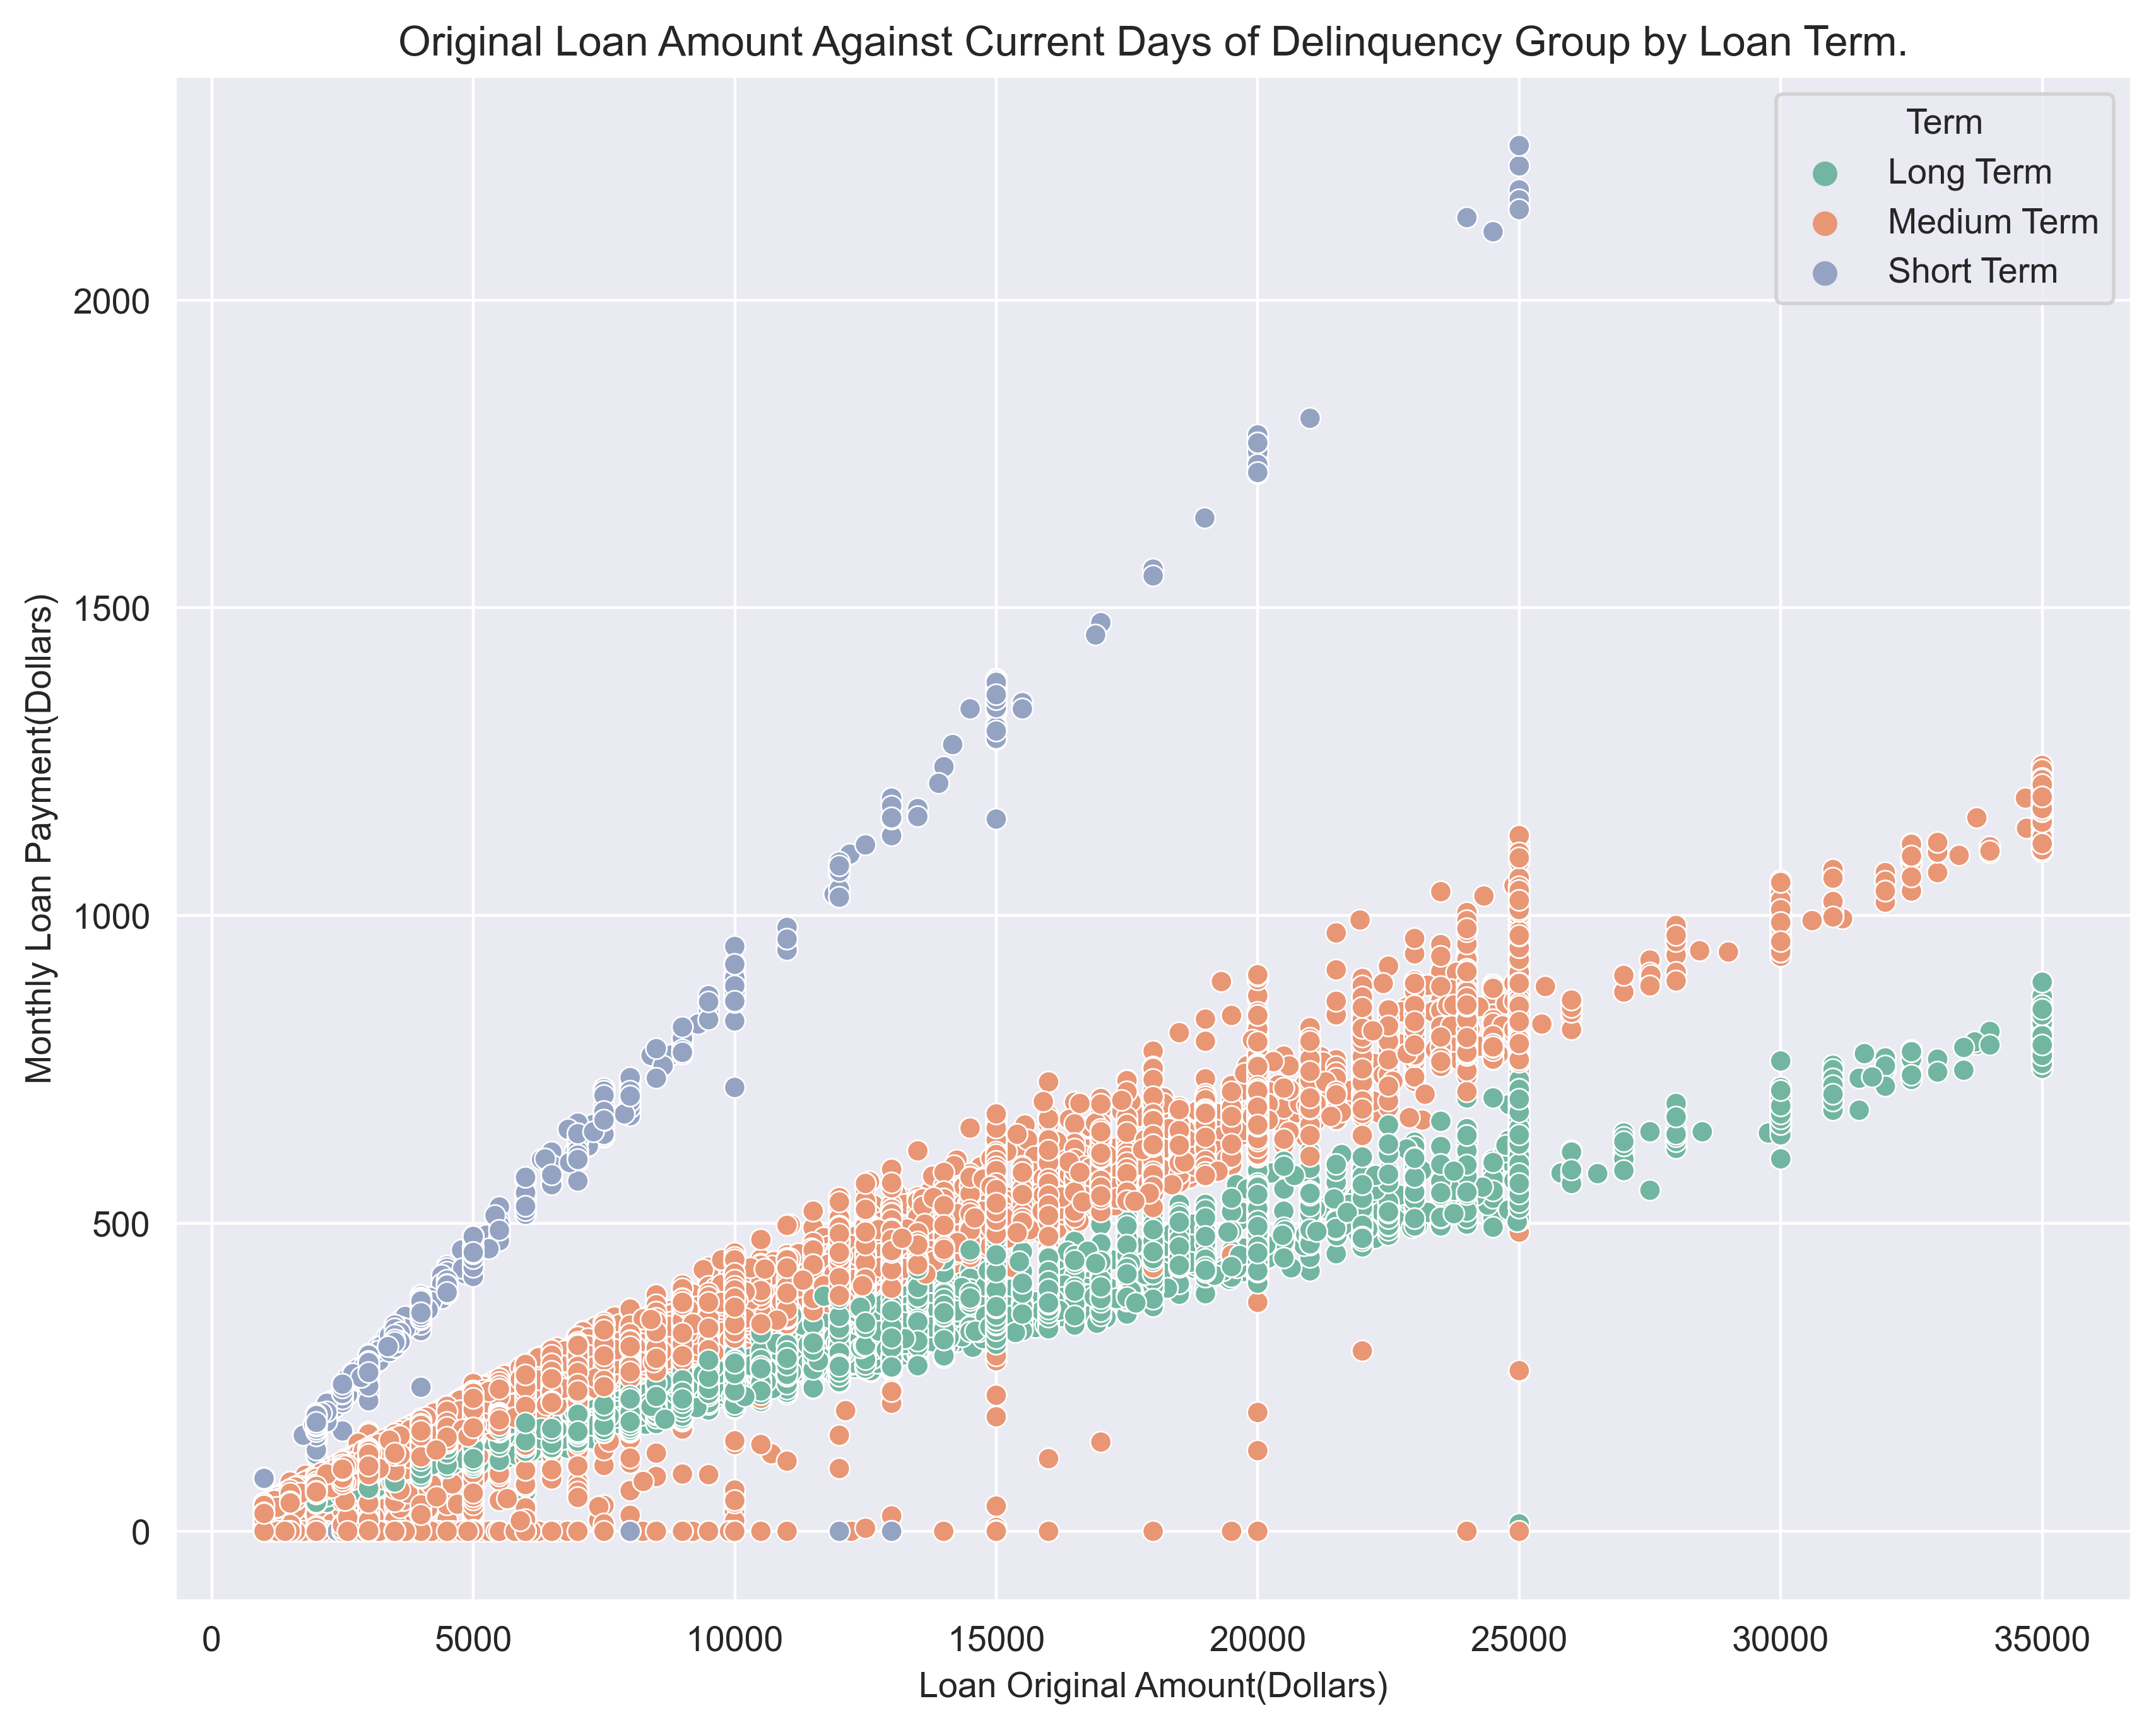

In [111]:
# call func to plot scatter plot group by loan term
draw_scatter('Term', 'Original Loan Amount Against Current Days of Delinquency Group by Loan Term.')

## Original Loan Amount Against Current Days of Delinquency Group by Loan Year
> To showcase the relationship between three variables, two continous numerical variable(loan original amount and monthly loan payment) and a categorical variable(year) it was cemented from earlier findings there exist a positive relationship between the loan original amount and monthly loan payment, the data point are spread across the scatterplot below categorized by the year of loan. 

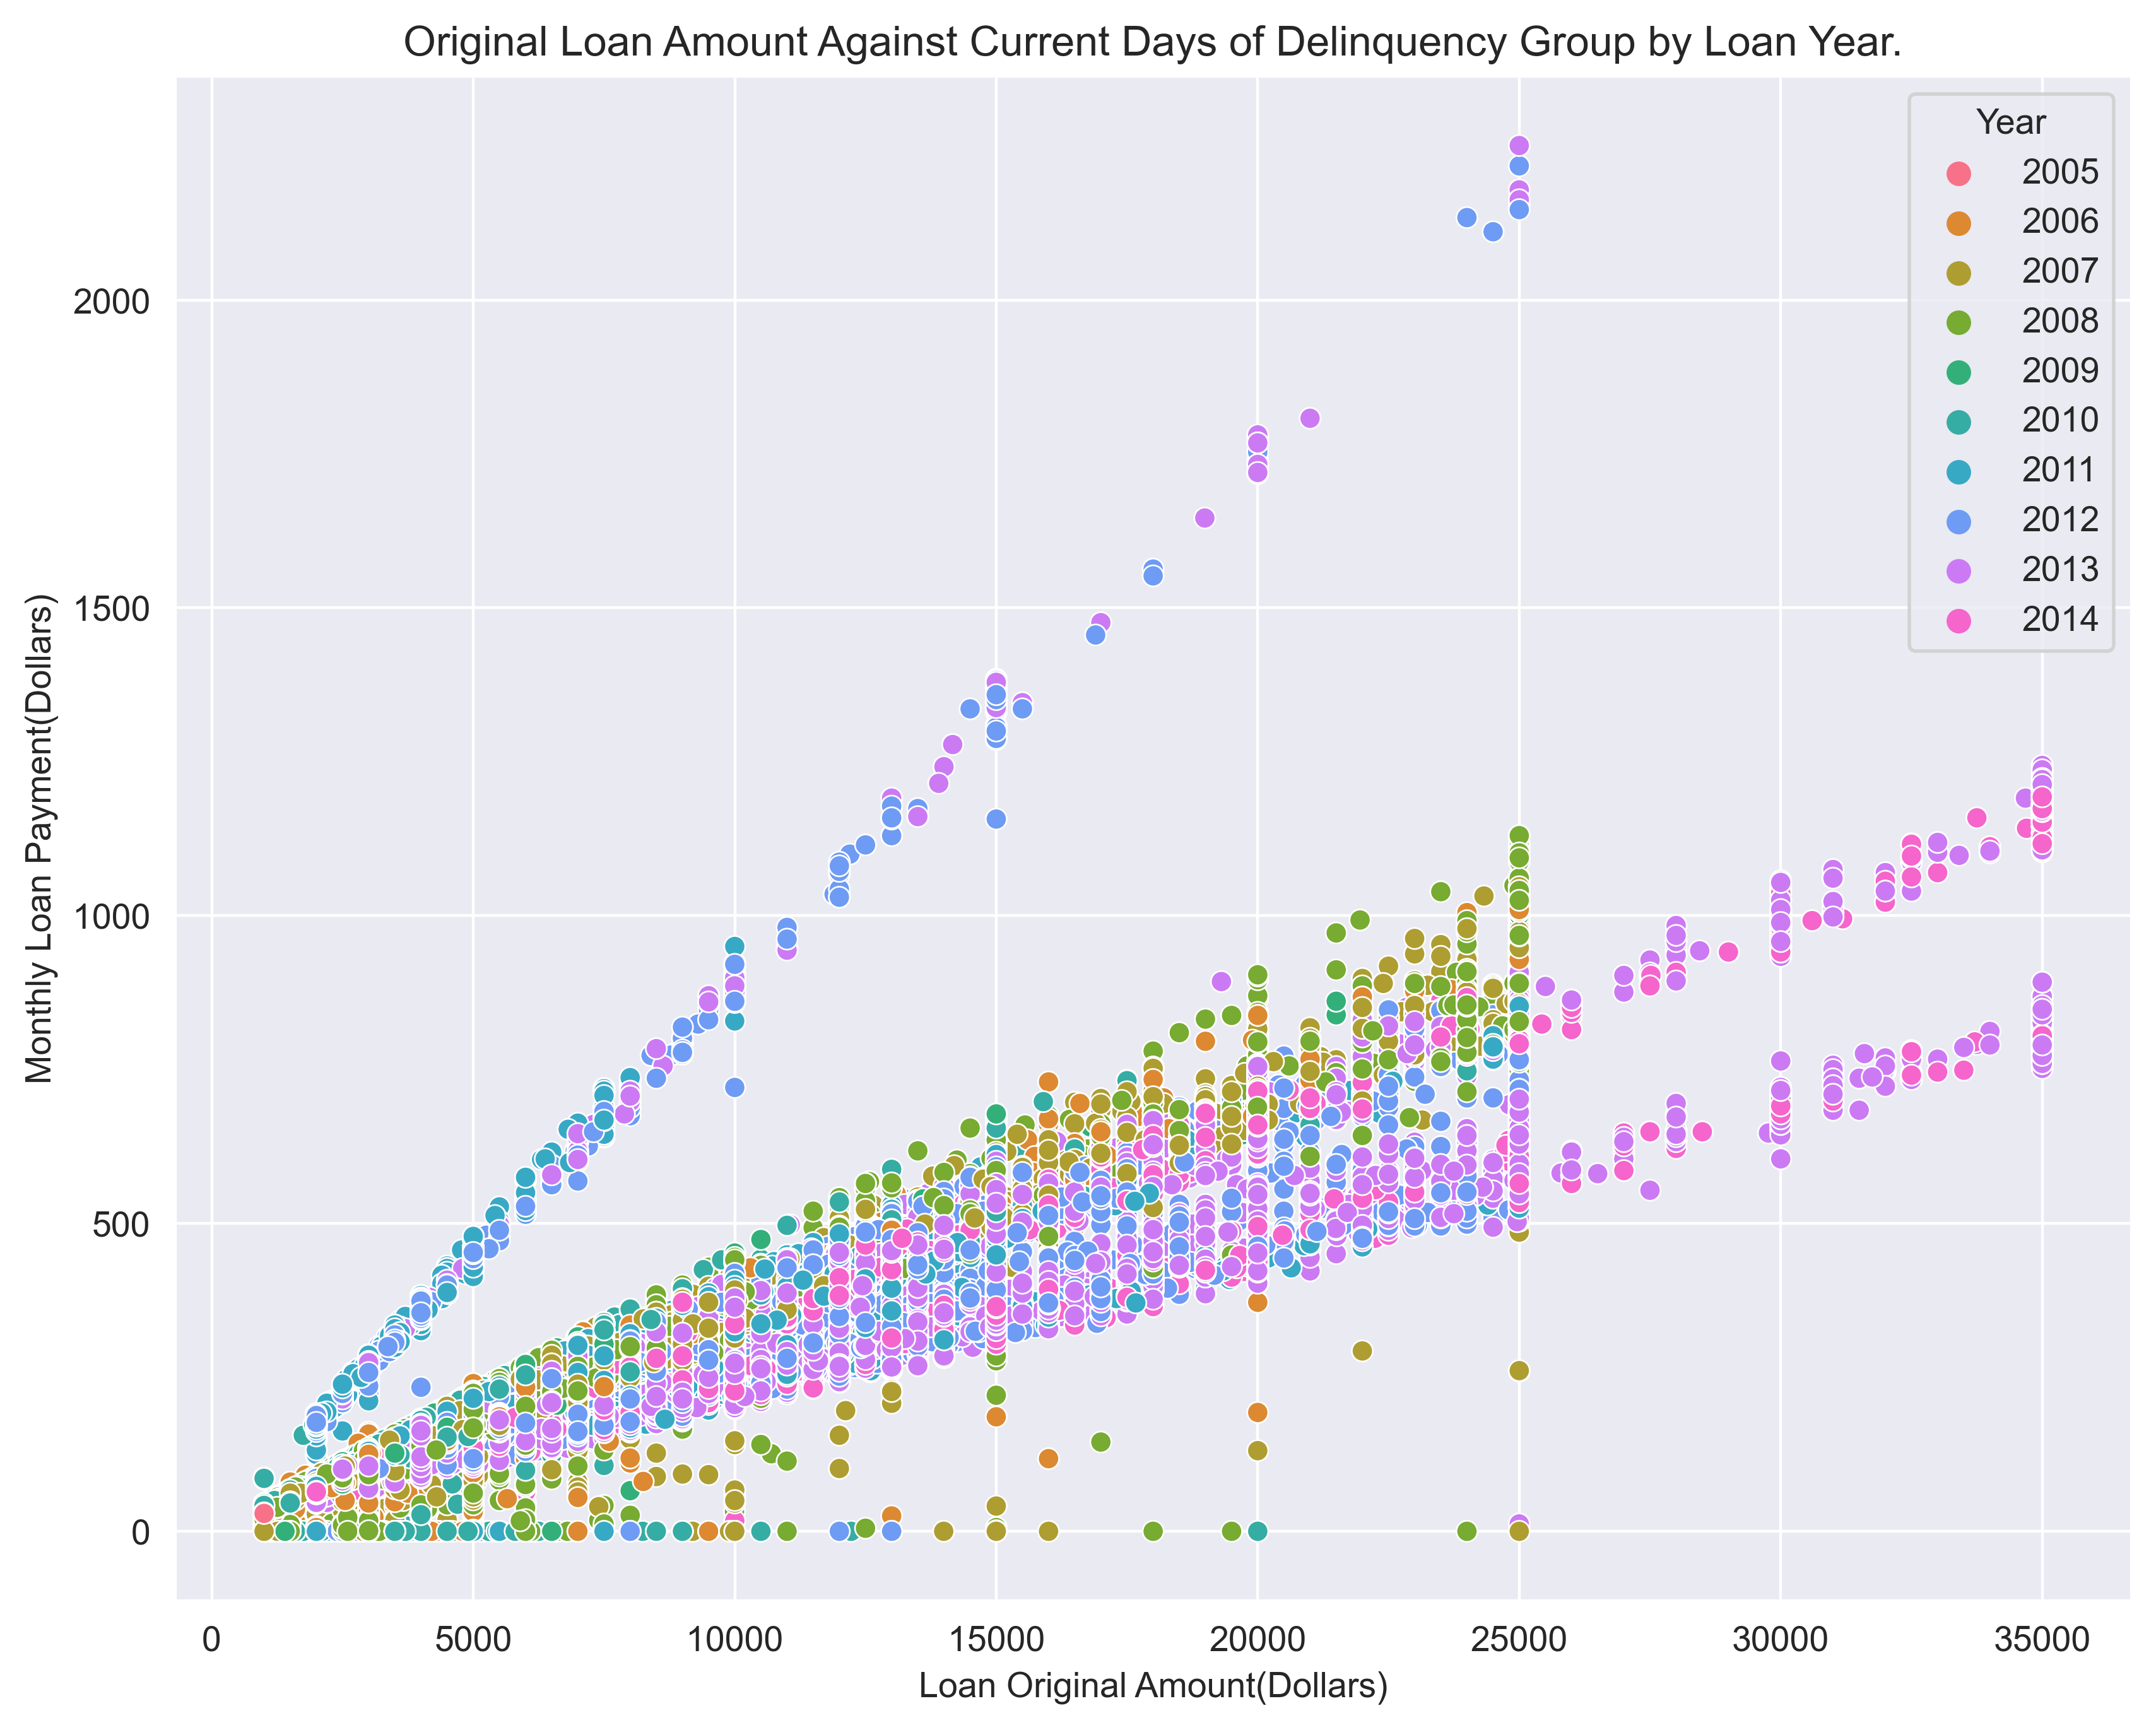

In [112]:
# call func to plot scatter plot group by year
draw_scatter('Year', 'Original Loan Amount Against Current Days of Delinquency Group by Loan Year.')

## Original Loan Amount Against Current Days of Delinquency Group Employment Status
> To showcase the relationship between three variables, two continous numerical variable(loan original amount and monthly loan payment) and a categorical variable(employment status) it was cemented from earlier findings there exist a positive relationship between the loan original amount and monthly loan payment, the data point are spread across the scatterplot below categorized by employment status.

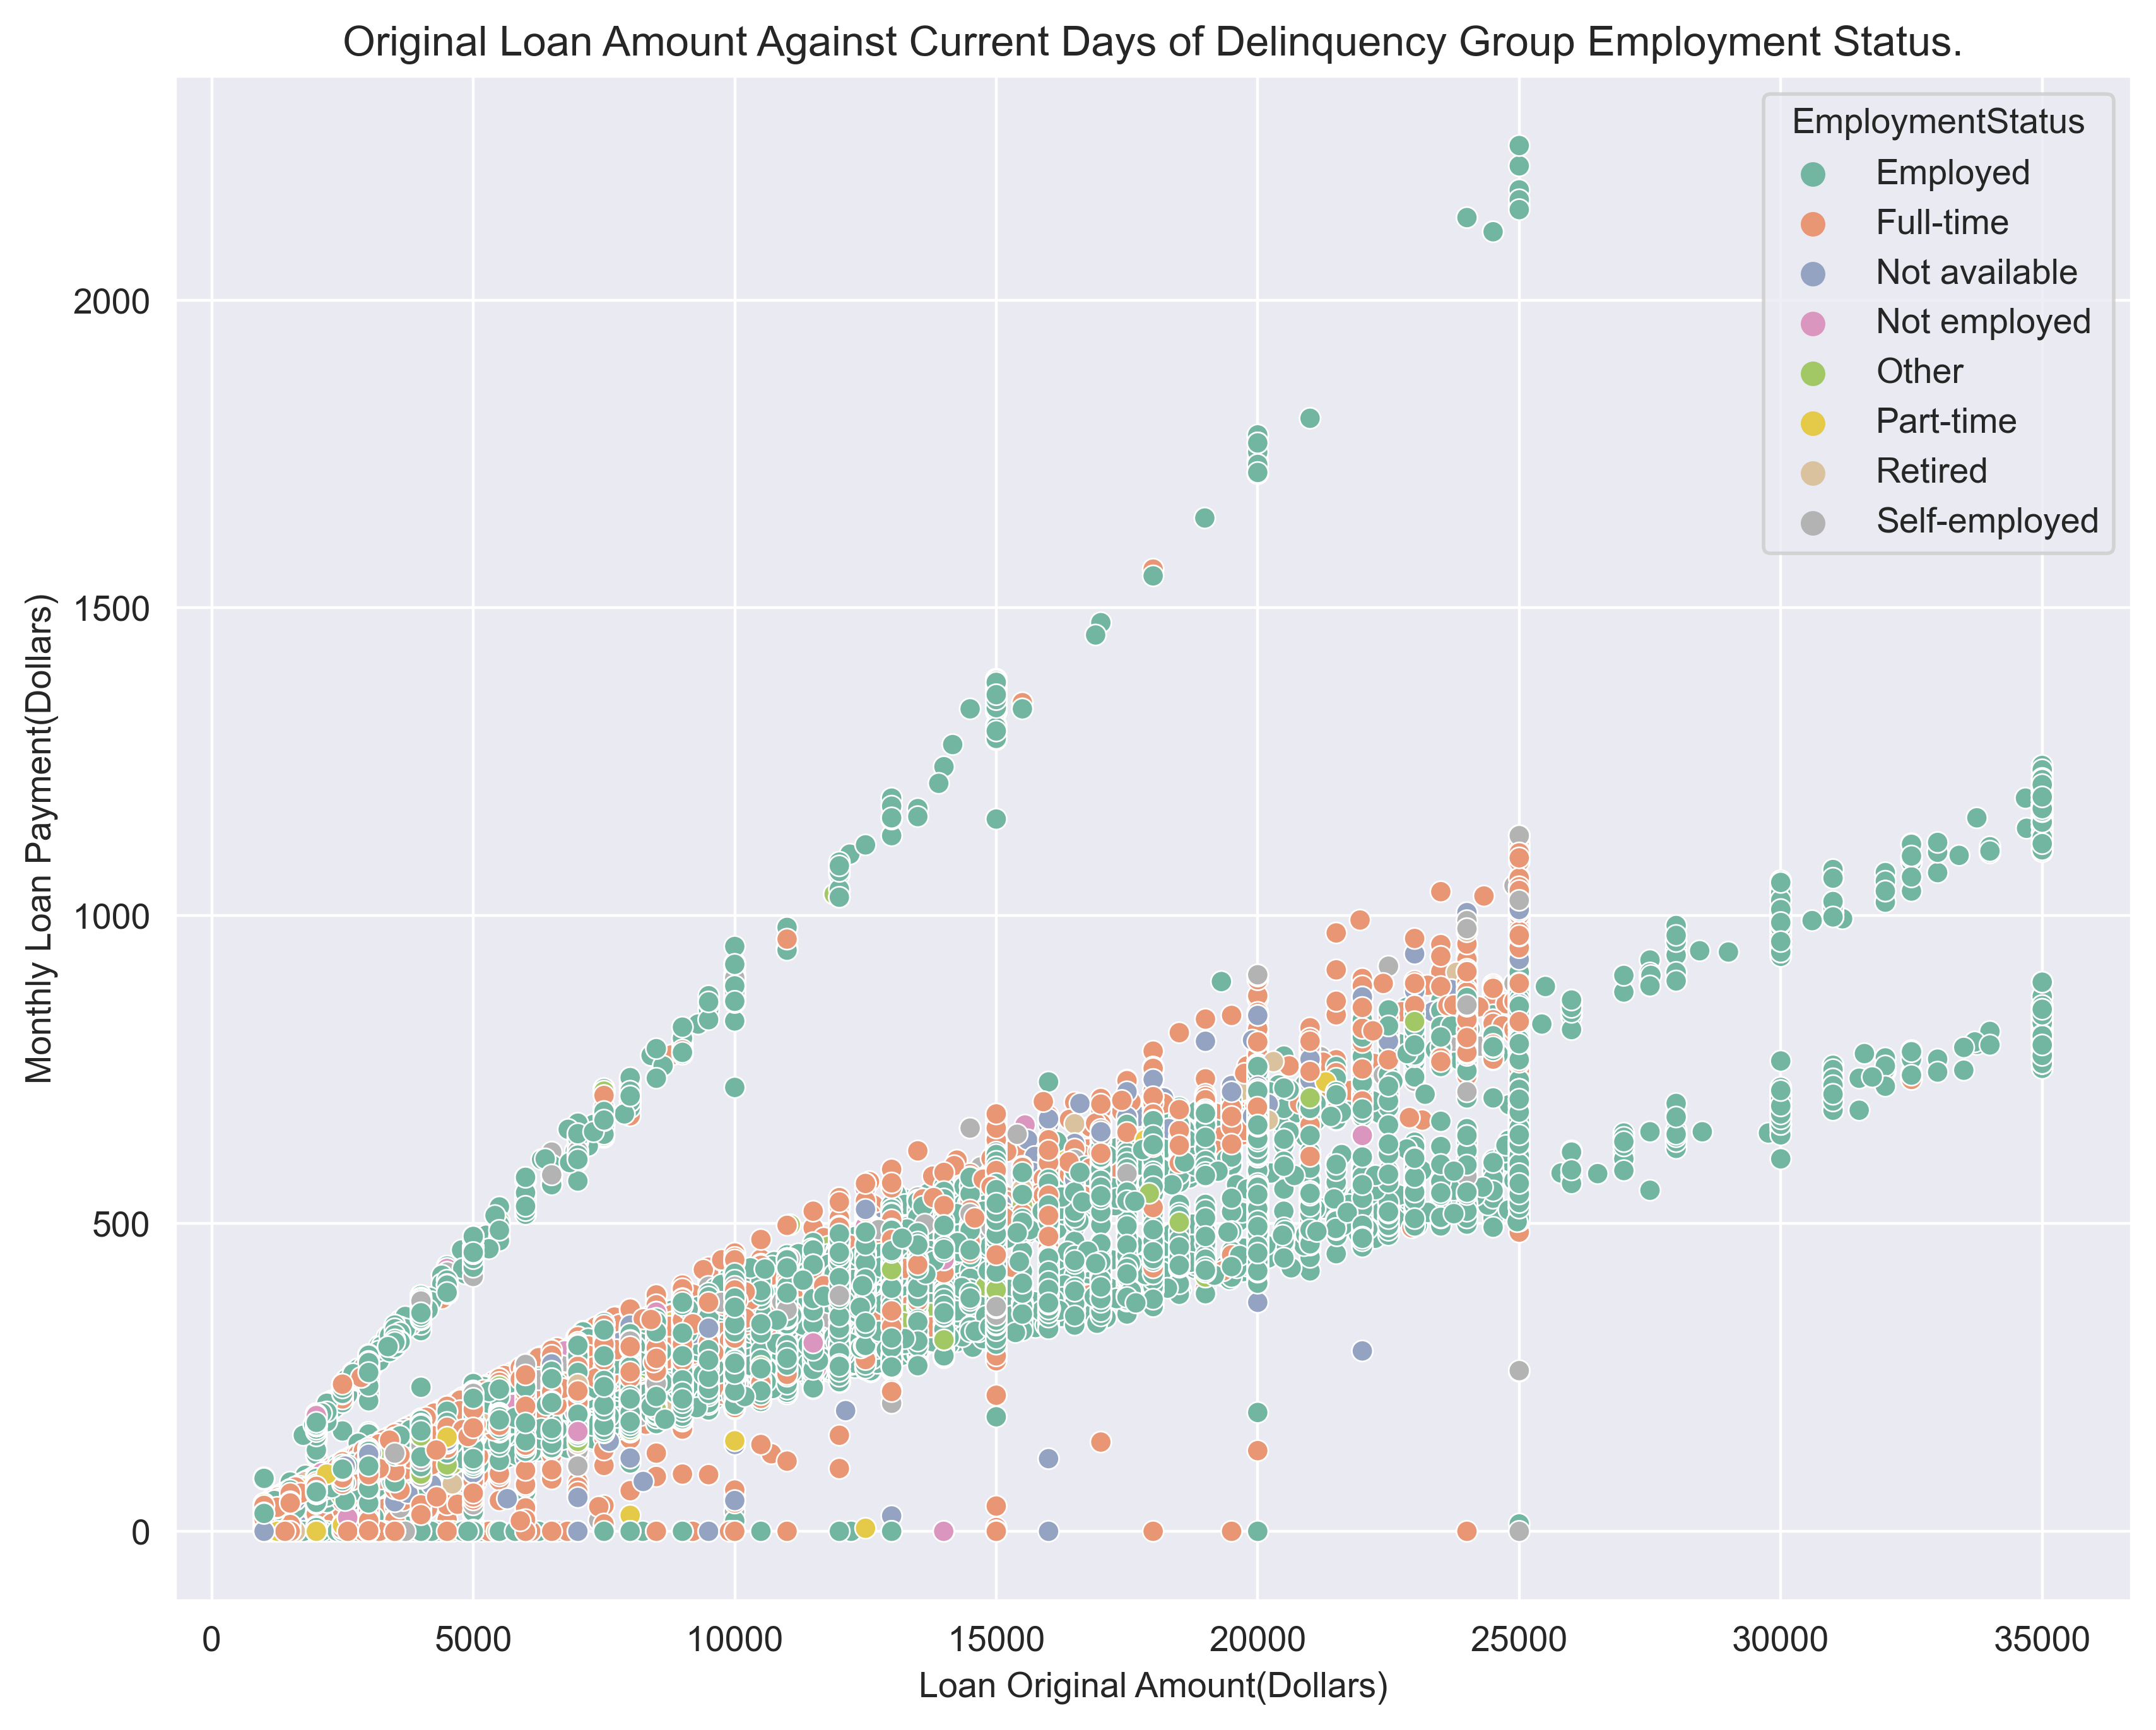

In [113]:
# call func to plot scatter plot group by employment status
draw_scatter('EmploymentStatus', 'Original Loan Amount Against Current Days of Delinquency Group Employment Status.')

## Correlation Matrix Depicting Relationship Between Variable with Heatmap
> Depictig the correlation of numerical variables based on linear properties between variables by plotting heatmap of a correlation matrix the figure below indicates the correlation by the heatmap, we could vizualize we have a positive correlation between loan original amount and monthly loan payment with a correlation coefficient of 0.93, the stated monthly income and the original loan amount seems to have no correlation between them.

Text(0.5, 1.0, 'Correlation Matrix Depicting Relationship Between Variable with Heatmap.')

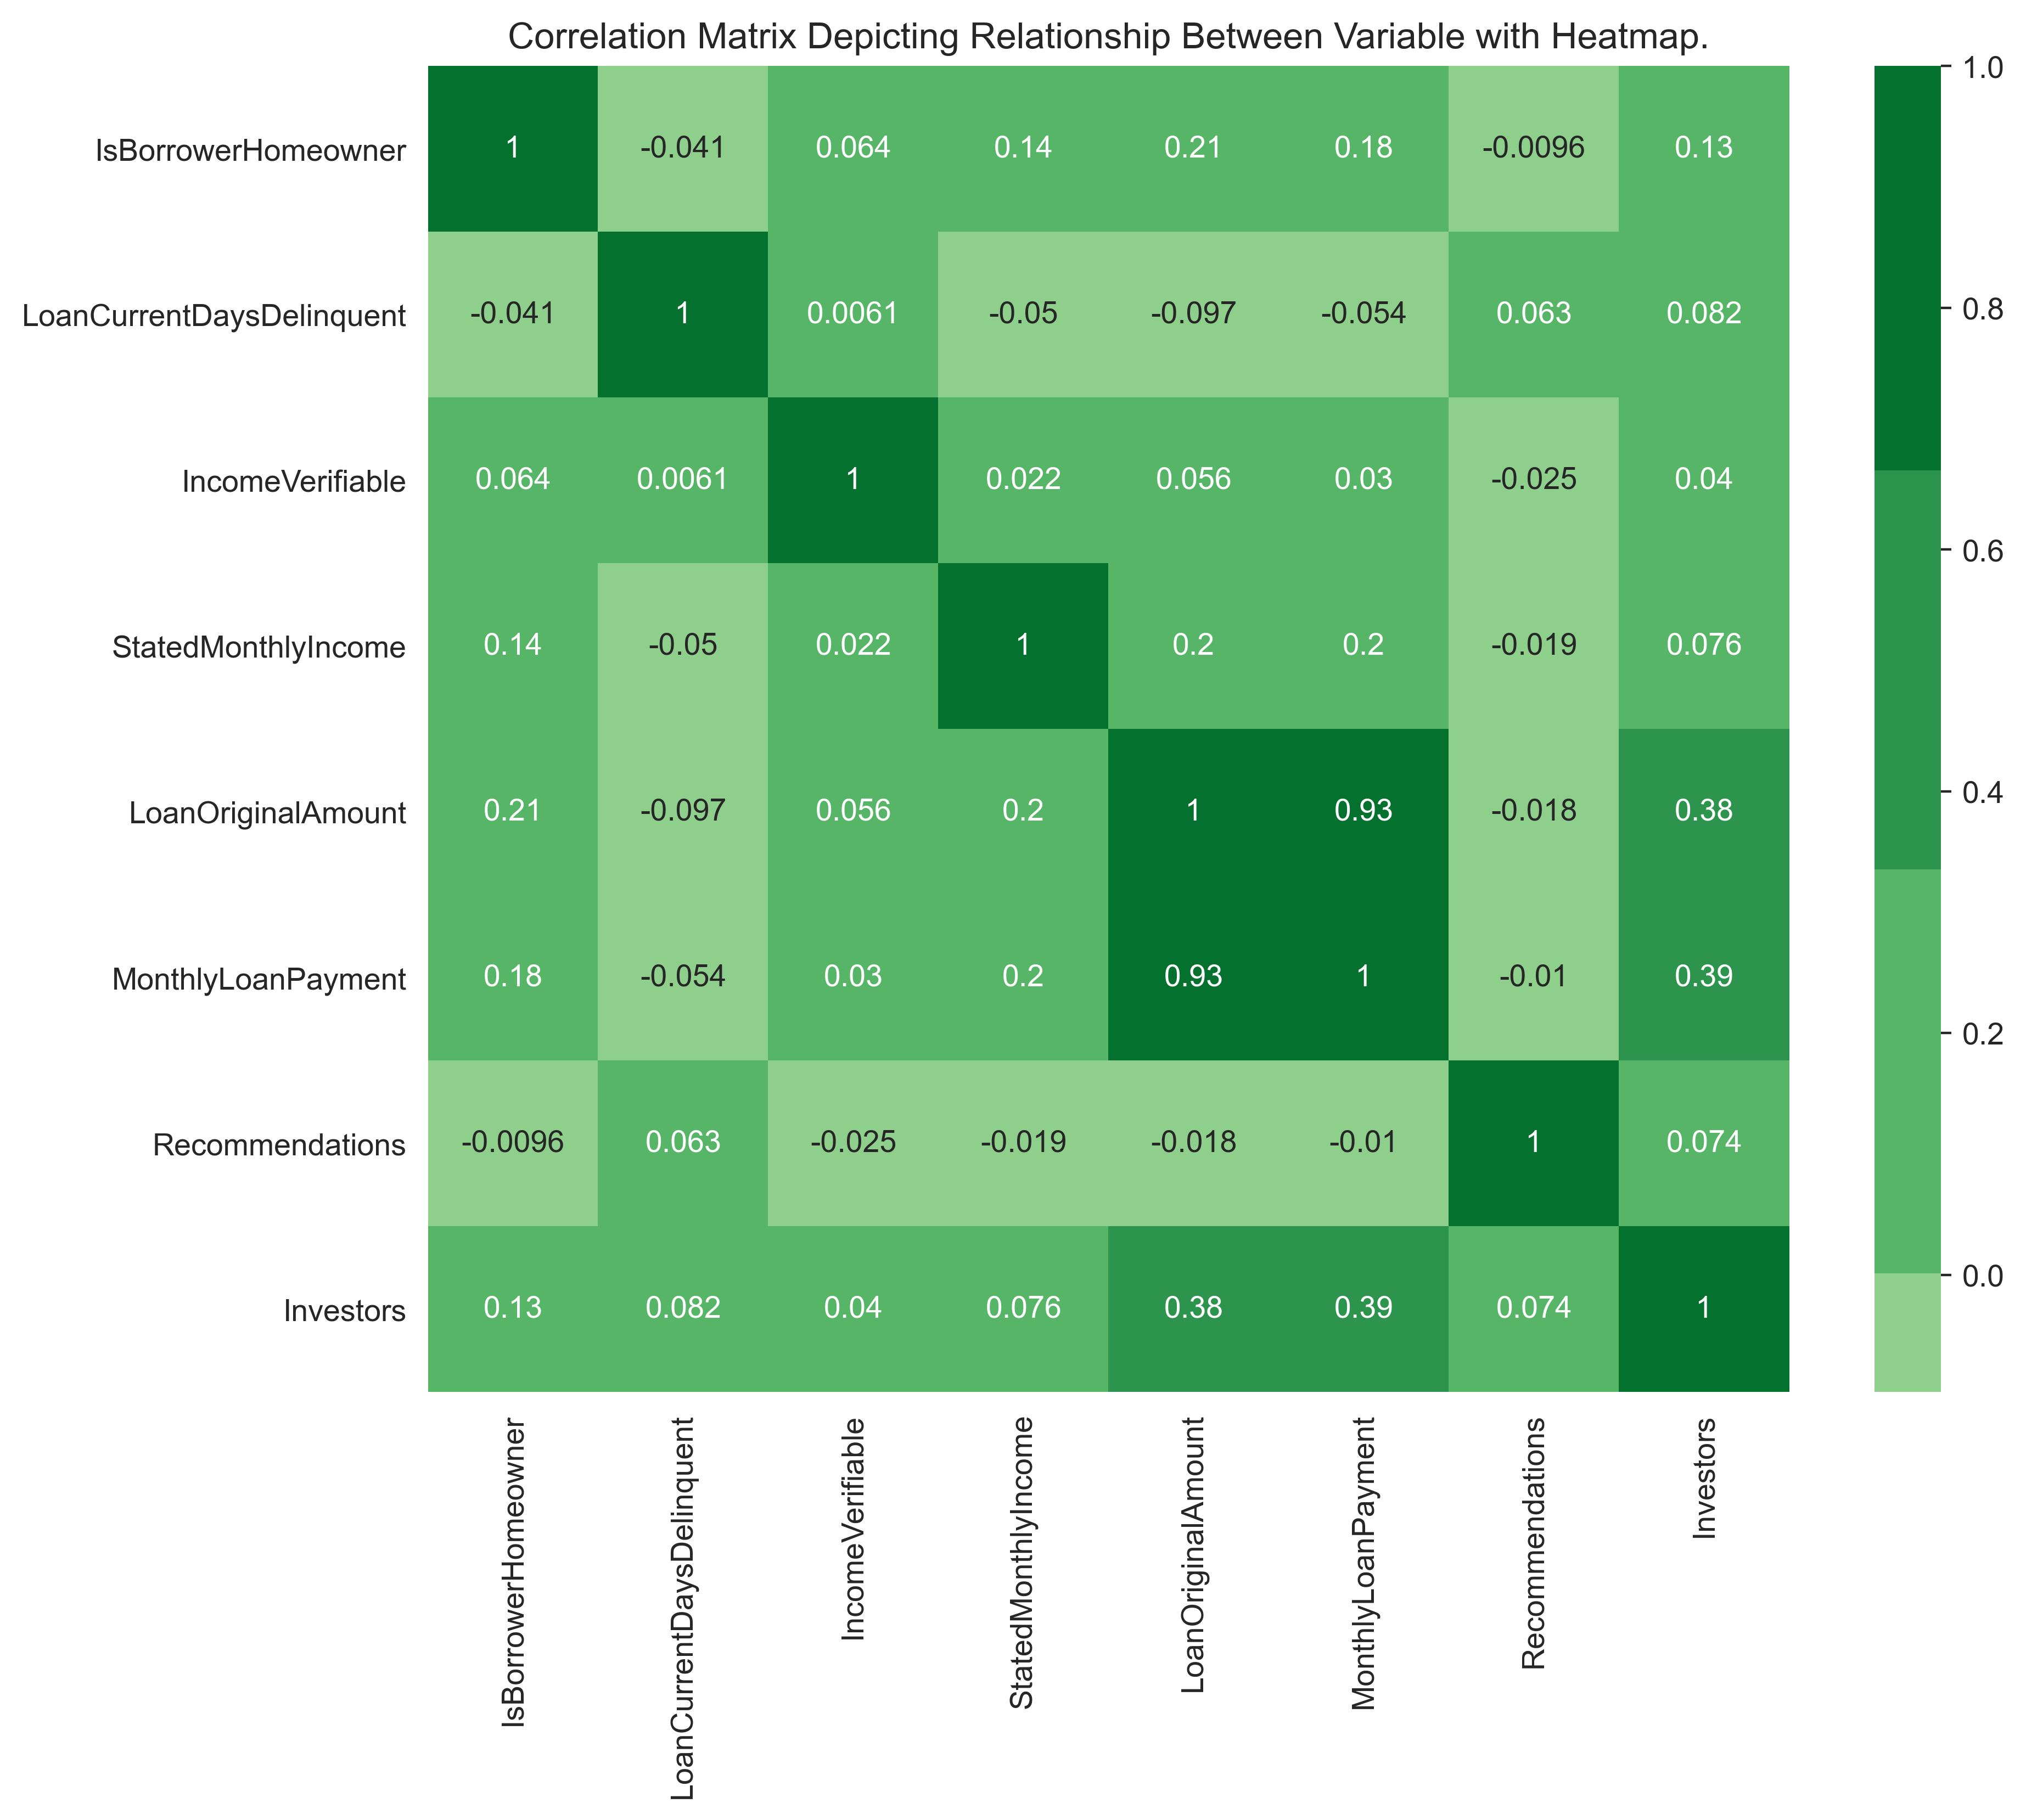

In [114]:
# plot a heatmap to show correlation
plt.figure(figsize=(10,8), dpi = 400)
colormap = sns.color_palette('Greens')
sns.heatmap(shrink_loan_df.corr(), annot = True, cmap = colormap, center = 0)
plt.title('Correlation Matrix Depicting Relationship Between Variable with Heatmap.')


In [ ]:
# creatina a slide show
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt